In [2]:
!pip install tabula-py

In [3]:
#import dependencies
import pandas as pd
import numpy as np
import requests
import json
import gmaps
import time
import csv
import ipywidgets as widgets
import matplotlib.pyplot as plt
from config import api_key
from config_new import gkey
from tabula import read_pdf, convert_into

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
#establish lists to hold variables
name = []
established = []
region = []
lat = []
lng = []

#loop to iterate through pages of brewery location data 
for page_num in range(1,193):
    
    #set sleep parameter for api call limit
    time.sleep(1)
    
    #query url
    url = "https://api.brewerydb.com/v2/locations/?key=" + api_key + "&countryIsoCode=US" + "&p=" + str(page_num)
                                                                                 
    print("Downloading", url)
    
    #request data from API                                                                            
    response=requests.get(url).json()

    #for loop to get data within eage page
    for brewery in response['data']:
        try:
            name.append(brewery['brewery']['name'])
        except:
            name.append(None)
        try:
            established.append(brewery['brewery']['established'])
        except:
            established.append(None)
        try:
            region.append(brewery['region'])
        except:
            region.append(None)
        try:
            lat.append(brewery['latitude'])
        except:
            lat.append(None)
        try:
            lng.append(brewery['longitude'])
        except:
            lng.append(None)   
    

In [5]:
#create dataframe
brewery_df = pd.DataFrame({
                    "Name": name,
                    "Established Year": established,
                    "Region": region,
                    "Latitude": lat,
                    "Longitude": lng
                            })

#create CSV
new_df.to_csv("new_brewery_data.csv")
# One limitation to our data was that many locations did not include an established year

In [4]:
#import cleaned csv file
csv = "/Users/bryanwood/Desktop/Project_1_Team_2/Bryan's code/us_brewery_list.csv"
clean_brewery_list = pd.read_csv(csv)
cleanBrew_df = clean_brewery_list.sort_values("Region", ascending=True)
cleanBrew_df.head()


,Name,Established Year,Region,Latitude,Longitude
1512,Cross-Eyed Owl Brewing Co.,2018,Alabama,34.604303,-86.986716
347,Avondale Brewing Company,2011,Alabama,33.524545,-86.774171
3530,Old Majestic Brewing Co.,2019,Alabama,30.690167,-88.051078
1996,"Folklore Brewing & Meadery, LLC",2015,Alabama,31.148652,-85.394785
4537,Straight to Ale,2009,Alabama,34.693672,-86.591995


In [5]:
#creating dataframe to include all brewery locations that were open as of 1990
priorTo1990 = cleanBrew_df.loc[cleanBrew_df["Established Year"] <= 1990, [
    "Name", "Established Year", "Region", "Latitude", "Longitude"]]
priorTo1990["Region"].count()

475

In [6]:
#creating dataframe to include all brewery locations that were open as of 2009
priorTo2009 = cleanBrew_df.loc[cleanBrew_df["Established Year"] <= 2009, [
    "Name", "Established Year", "Region", "Latitude", "Longitude"]]
priorTo2009["Region"].count()

1743

In [7]:
#creating dataframe to include all brewery locations that were open as of present
priorTo2019 = cleanBrew_df.loc[cleanBrew_df["Established Year"] <= 2019, [
    "Name", "Established Year", "Region", "Latitude", "Longitude"]]
priorTo2019["Region"].count()

5330

In [8]:
#plotting 1990 brewery map
locations = priorTo1990[['Latitude', 'Longitude']]
brewery_layer = gmaps.symbol_layer(
    locations, fill_color='red', stroke_color='red', scale=2)
fig = gmaps.figure()
fig.add_layer(brewery_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#plotting 2009 brewery map
locations1 = priorTo2009[['Latitude', 'Longitude']]
brewery_layer = gmaps.symbol_layer(
    locations1, fill_color='red', stroke_color='red', scale=2)
fig = gmaps.figure()
fig.add_layer(brewery_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
#plotting 2019 brewery map
locations2 = priorTo2019[['Latitude', 'Longitude']]
brewery_layer = gmaps.symbol_layer(
    locations2, fill_color='red', stroke_color='red', scale=2)
fig = gmaps.figure()
fig.add_layer(brewery_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Question:
* What is growth rate of breweries over time for each state?
* How does growth rate change when normalized to population, land mass, or average income?

### Data Sources:
* Brewery number per state per year: https://www.ttb.gov/foia/frl.shtml (file name q4_brewery_count_by_state_1984_dec2018.xls)
* Population per state per year: 2010 census population data and goverment estimates of population per state by year available from https://factfinder.census.gov/
* Size of each state in square miles: https://www.census.gov/geo/reference/state-area.html
* Average income and % poverty per state per year: from the American Community Survey (ACS) via factfinder.census.gov
* State abbreviations, regions, and US Census regions to allow various sorting and labeling of data:  https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv

In [3]:
#Convert Excel file to dataframe; parameters: skip rows 0-6, then use new rows 0-1 as headers, define data types
data_org_df = pd.read_excel('../Raw Data Sources/q4_brewery_count_by_state_1984_dec2018.xls', 'FOIA Page', header = [0], 
                         skiprows = [0,1,2,3,4,5,6,8])
#data_xls.to_csv('your_csv.csv', encoding='utf-8')
data_org_df.head()

,Unnamed: 0,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AK,NaN,NaN,NaN,NaN,NaN,*,*,3,4,...,18,20.0,23,25.0,25.0,28.0,35.0,36.0,45.0,51.0
1,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*,...,5,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
2,AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*,...,5,5.0,7,13.0,18.0,23.0,29.0,34.0,44.0,53.0
3,AZ,NaN,NaN,NaN,NaN,*,6,8,8,7,...,34,37.0,45,55.0,59.0,77.0,91.0,110.0,130.0,146.0
4,CA,9,12,15,23,39,50,67,76,93,...,340,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0


In [4]:
#Cleaning up dataframe: drop bottom 4 rows with no data
data_df = data_org_df[0:53]
#Drop index [51] (other US territories), as it won't be included in analysis
data_df = data_df.drop([51])
#Clean up column headers
data_df = data_df.rename(columns = {"Unnamed: 0" : "State Code"})
#Replace NaN with zero
data_df = data_df.fillna(0)
#Replace * with zero
data_df = data_df.replace({'*' : 0})
    
data_df.head()

,State Code,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AK,0,0,0,0,0,0,0,3,4,...,18,20.0,23,25.0,25.0,28.0,35.0,36.0,45.0,51.0
1,AL,0,0,0,0,0,0,0,0,0,...,5,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
2,AR,0,0,0,0,0,0,0,0,0,...,5,5.0,7,13.0,18.0,23.0,29.0,34.0,44.0,53.0
3,AZ,0,0,0,0,0,6,8,8,7,...,34,37.0,45,55.0,59.0,77.0,91.0,110.0,130.0,146.0
4,CA,9,12,15,23,39,50,67,76,93,...,340,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0


In [11]:
#Import csv file with US Census regions and divisions to allow sorting by subsets of states
#File from https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
state_region_df = pd.read_csv('../Raw Data Sources/us_census_regions_divisions.csv', delimiter = ',',  encoding='utf-8')
state_region_df.head()

#Merge dataframes on State Code
brew_ct_df = pd.merge(state_region_df,data_df, on = "State Code")
brew_ct_df.head()

#Save as csv files in case group members want it
brew_ct_df.to_csv(r'../Raw Data Sources/brewery_per_state_cleaned.csv')

In [12]:
#Sort data by region
region_df = brew_ct_df.sort_values("Region")
region_df # Midwest (12), Northeast (9), South (17), West (13)

,State,State Code,Region,Division,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
28,North Dakota,ND,Midwest,West North Central,0,0,0,0,0,0,...,3,3.0,3,7.0,8.0,10.0,11.0,15.0,22.0,26.0
35,Ohio,OH,Midwest,East North Central,0,0,0,0,3,5,...,66,75.0,81,99.0,114.0,151.0,187.0,236.0,324.0,377.0
15,Indiana,IN,Midwest,East North Central,0,0,0,0,0,4,...,39,43.0,59,72.0,95.0,116.0,151.0,163.0,213.0,234.0
48,Wisconsin,WI,Midwest,East North Central,5,6,7,10,12,14,...,108,119.0,126,146.0,146.0,168.0,189.0,217.0,261.0,303.0
41,South Dakota,SD,Midwest,West North Central,0,0,0,0,0,0,...,7,8.0,9,12.0,12.0,15.0,19.0,21.0,28.0,35.0
14,Illinois,IL,Midwest,East North Central,0,0,0,0,4,5,...,60,62.0,68,95.0,123.0,164.0,210.0,244.0,291.0,338.0
29,Nebraska,NE,Midwest,West North Central,0,0,0,0,0,0,...,17,16.0,18,20.0,25.0,35.0,39.0,47.0,53.0,60.0
16,Kansas,KS,Midwest,West North Central,0,0,0,0,0,0,...,17,17.0,21,21.0,25.0,27.0,37.0,47.0,53.0,64.0
24,Missouri,MO,Midwest,West North Central,0,0,0,0,0,0,...,47,51.0,55,60.0,63.0,77.0,90.0,116.0,145.0,168.0
23,Minnesota,MN,Midwest,West North Central,0,0,3,4,5,7,...,39,42.0,56,70.0,75.0,113.0,142.0,165.0,214.0,239.0


In [13]:
#Sort data by Division
division_df = brew_ct_df.sort_values("Division")
division_df 
# Divisions are: East North Central (5), East South Central (4), Middle Atlantic (3), Mountain (8), 
# New England (6), Pacific (5), South Atlantic (9), West North Central (7), West South Central (4)

,State,State Code,Region,Division,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
48,Wisconsin,WI,Midwest,East North Central,5,6,7,10,12,14,...,108,119.0,126,146.0,146.0,168.0,189.0,217.0,261.0,303.0
35,Ohio,OH,Midwest,East North Central,0,0,0,0,3,5,...,66,75.0,81,99.0,114.0,151.0,187.0,236.0,324.0,377.0
22,Michigan,MI,Midwest,East North Central,0,0,0,0,3,3,...,104,111.0,131,160.0,195.0,256.0,316.0,379.0,452.0,510.0
14,Illinois,IL,Midwest,East North Central,0,0,0,0,4,5,...,60,62.0,68,95.0,123.0,164.0,210.0,244.0,291.0,338.0
15,Indiana,IN,Midwest,East North Central,0,0,0,0,0,4,...,39,43.0,59,72.0,95.0,116.0,151.0,163.0,213.0,234.0
25,Mississippi,MS,South,East South Central,0,0,0,0,0,0,...,0,3.0,0,4.0,7.0,10.0,14.0,14.0,16.0,19.0
1,Alabama,AL,South,East South Central,0,0,0,0,0,0,...,5,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
42,Tennessee,TN,South,East South Central,0,0,0,0,0,0,...,23,26.0,31,45.0,51.0,69.0,88.0,101.0,120.0,140.0
17,Kentucky,KY,South,East South Central,0,0,0,0,0,0,...,15,14.0,21,25.0,25.0,38.0,48.0,60.0,73.0,86.0
38,Pennsylvania,PA,Northeast,Middle Atlantic,4,4,5,6,6,8,...,96,118.0,146,162.0,183.0,233.0,278.0,333.0,411.0,472.0


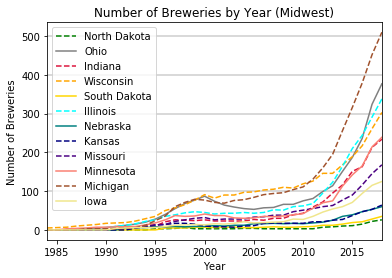

In [17]:
#use for loop to generate a list of year covered in the table; these will be the reference for the x axis labels
iyear = 1984
years = []
for i in range(35):
    iyear = 1984 + i
    years.append(iyear)
years
#Create a list of name for this region (row 0-11)
breweries_midwest_name = region_df.iloc[0:12, 0].values.tolist()
# Names: ['North Dakota','Ohio', 'Indiana', 'Wisconsin', 'South Dakota', 'Illinois', 'Nebraska', 'Kansas', 
# 'Missouri','Minnesota', 'Michigan', 'Iowa']
#Make and format plot
plt.plot(years, region_df.iloc[0, 4:], 'k--',  color = "green", label = "North Dakota")
plt.plot(years, region_df.iloc[1, 4:], 'k-',  color = "grey", label = "Ohio")
plt.plot(years, region_df.iloc[2, 4:], 'k--',  color = "crimson", label = "Indiana")
plt.plot(years, region_df.iloc[3, 4:], 'k--',  color = "orange", label = "Wisconsin")
plt.plot(years, region_df.iloc[4, 4:], 'k-',  color = "gold", label = "South Dakota")
plt.plot(years, region_df.iloc[5, 4:], 'k--',  color = "aqua", label = "Illinois")
plt.plot(years, region_df.iloc[6, 4:], 'k-',  color = "teal", label = "Nebraska")
plt.plot(years, region_df.iloc[7, 4:], 'k--',  color = "navy", label = "Kansas")
plt.plot(years, region_df.iloc[8, 4:], 'k--',  color = "indigo", label = "Missouri")
plt.plot(years, region_df.iloc[9, 4:], 'k-',  color = "salmon", label = "Minnesota")
plt.plot(years, region_df.iloc[10, 4:], 'k--',  color = "sienna", label = "Michigan")
plt.plot(years, region_df.iloc[11, 4:], 'k-',  color = "khaki", label = "Iowa")
plt.hlines(100, 1984, 2020, alpha = 0.2)
plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(300, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(500, 1984, 2020, alpha = 0.2)
plt.legend()
plt.title("Number of Breweries by Year (Midwest)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/midwest_breweries.png", dpi=300)
plt.show()

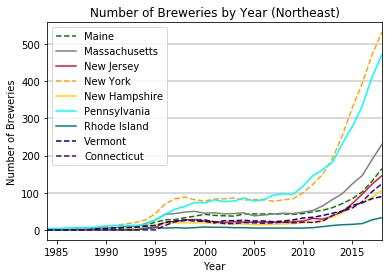

In [18]:
#Create a list of name for this region (row 12-20)
breweries_NE_name = region_df.iloc[12:21, 0].values.tolist()
# Names: ['Maine', 'Massachusetts', 'New Jersey', 'New York', 'New Hampshire', 'Pennsylvania', 'Rhode Island',
# 'Vermont', 'Connecticut']
#Make and format plot
plt.plot(years, region_df.iloc[12, 4:], 'k--',  color = "green", label = "Maine")
plt.plot(years, region_df.iloc[13, 4:], 'k-',  color = "grey", label = "Massachusetts")
plt.plot(years, region_df.iloc[14, 4:], 'k-',  color = "crimson", label = "New Jersey")
plt.plot(years, region_df.iloc[15, 4:], 'k--',  color = "orange", label = "New York")
plt.plot(years, region_df.iloc[16, 4:], 'k-',  color = "gold", label = "New Hampshire")
plt.plot(years, region_df.iloc[17, 4:], 'k-',  color = "aqua", label = "Pennsylvania")
plt.plot(years, region_df.iloc[18, 4:], 'k-',  color = "teal", label = "Rhode Island")
plt.plot(years, region_df.iloc[19, 4:], 'k--',  color = "navy", label = "Vermont")
plt.plot(years, region_df.iloc[20, 4:], 'k--',  color = "indigo", label = "Connecticut")
plt.hlines(100, 1984, 2020, alpha = 0.2)
plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(300, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(500, 1984, 2020, alpha = 0.2)
plt.legend()
plt.title("Number of Breweries by Year (Northeast)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/northeast_breweries.png", dpi=300)
plt.show()

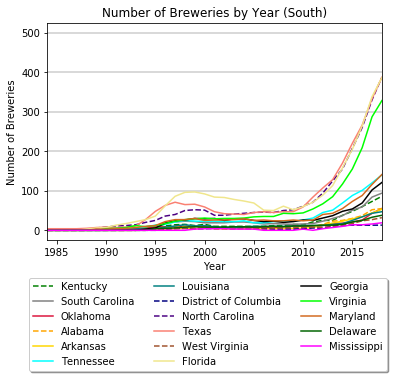

In [19]:
#Create a list of name for this region (row 21-37)
breweries_south_name = region_df.iloc[21:38, 0].values.tolist()
# Names: ['Kentucky', 'South Carolina', 'Oklahoma', 'Alabama', 'Arkansas', 'Tennessee', 'Louisiana',
#'District of Columbia', 'North Carolina', 'Texas', 'West Virginia', 'Florida', 'Georgia', 'Virginia',
#'Maryland', 'Delaware', 'Mississippi']
#Make and format plot
plt.plot(years, region_df.iloc[21, 4:], 'k--',  color = "green", label = "Kentucky")
plt.plot(years, region_df.iloc[22, 4:], 'k-',  color = "grey", label = "South Carolina")
plt.plot(years, region_df.iloc[23, 4:], 'k-',  color = "crimson", label = "Oklahoma")
plt.plot(years, region_df.iloc[24, 4:], 'k--',  color = "orange", label = "Alabama")
plt.plot(years, region_df.iloc[25, 4:], 'k-',  color = "gold", label = "Arkansas")
plt.plot(years, region_df.iloc[26, 4:], 'k-',  color = "aqua", label = "Tennessee")
plt.plot(years, region_df.iloc[27, 4:], 'k-',  color = "teal", label = "Louisiana")
plt.plot(years, region_df.iloc[28, 4:], 'k--',  color = "navy", label = "District of Columbia")
plt.plot(years, region_df.iloc[29, 4:], 'k--',  color = "indigo", label = "North Carolina")
plt.plot(years, region_df.iloc[30, 4:], 'k-',  color = "salmon", label = "Texas")
plt.plot(years, region_df.iloc[31, 4:], 'k--',  color = "sienna", label = "West Virginia")
plt.plot(years, region_df.iloc[32, 4:], 'k-',  color = "khaki", label = "Florida")
plt.plot(years, region_df.iloc[33, 4:], 'k-',  color = "black", label = "Georgia")
plt.plot(years, region_df.iloc[34, 4:], 'k-',  color = "lime", label = "Virginia")
plt.plot(years, region_df.iloc[35, 4:], 'k-',  color = "chocolate", label = "Maryland")
plt.plot(years, region_df.iloc[36, 4:], 'k-',  color = "darkgreen", label = "Delaware")
plt.plot(years, region_df.iloc[37, 4:], 'k-',  color = "magenta", label = "Mississippi")

plt.hlines(100, 1984, 2020, alpha = 0.2)
plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(300, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(500, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Breweries by Year (South)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/south_breweries.png", bbox_inches='tight', dpi=300)
plt.show()

In [20]:
breweries_west_name = region_df.iloc[38:51, 0].values.tolist()
breweries_west_name
# Names: ['Washington', 'Utah', 'Alaska', 'Nevada', 'New Mexico', 'Montana', 'Idaho', 'Hawaii',
# 'Colorado', 'California', 'Arizona', 'Oregon']

['Washington',
 'Utah',
 'Alaska',
 'Nevada',
 'New Mexico',
 'Montana',
 'Idaho',
 'Hawaii',
 'Colorado',
 'California',
 'Arizona',
 'Oregon',
 'Wyoming']

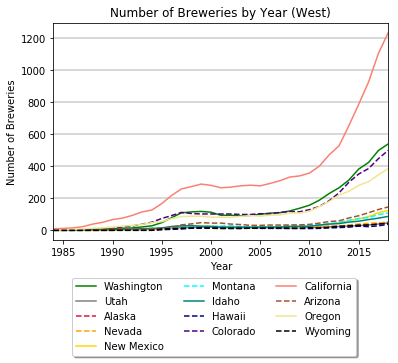

In [21]:
#Create a list of name for this region (row 38-50)
breweries_west_name = region_df.iloc[38:51, 0].values.tolist()
breweries_west_name
# Names: ['Washington', 'Utah', 'Alaska', 'Nevada', 'New Mexico', 'Montana', 'Idaho', 'Hawaii',
# 'Colorado', 'California', 'Arizona', 'Oregon', 'Wyoming']
#Make and format plot
plt.plot(years, region_df.iloc[38, 4:], 'k-',  color = "green", label = "Washington")
plt.plot(years, region_df.iloc[39, 4:], 'k-',  color = "grey", label = "Utah")
plt.plot(years, region_df.iloc[40, 4:], 'k--',  color = "crimson", label = "Alaska")
plt.plot(years, region_df.iloc[41, 4:], 'k--',  color = "orange", label = "Nevada")
plt.plot(years, region_df.iloc[42, 4:], 'k-',  color = "gold", label = "New Mexico")
plt.plot(years, region_df.iloc[43, 4:], 'k--',  color = "aqua", label = "Montana")
plt.plot(years, region_df.iloc[44, 4:], 'k-',  color = "teal", label = "Idaho")
plt.plot(years, region_df.iloc[45, 4:], 'k--',  color = "navy", label = "Hawaii")
plt.plot(years, region_df.iloc[46, 4:], 'k--',  color = "indigo", label = "Colorado")
plt.plot(years, region_df.iloc[47, 4:], 'k-',  color = "salmon", label = "California")
plt.plot(years, region_df.iloc[48, 4:], 'k--',  color = "sienna", label = "Arizona")
plt.plot(years, region_df.iloc[49, 4:], 'k-',  color = "khaki", label = "Oregon")
plt.plot(years, region_df.iloc[50, 4:], 'k--',  color = "black", label = "Wyoming")

plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(600, 1984, 2020, alpha = 0.2)
plt.hlines(800, 1984, 2020, alpha = 0.2)
plt.hlines(1000, 1984, 2020, alpha = 0.2)
plt.hlines(1200, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Breweries by Year (West)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/west_breweries.png", bbox_inches='tight', dpi=300)
plt.show()



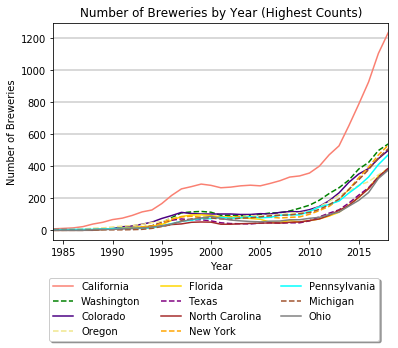

In [22]:
#Combine highest brewery values

#Make and format plot
plt.plot(years, region_df.iloc[47, 4:], 'k-',  color = "salmon", label = "California")
plt.plot(years, region_df.iloc[38, 4:], 'k--',  color = "green", label = "Washington")
plt.plot(years, region_df.iloc[46, 4:], 'k-',  color = "indigo", label = "Colorado")
plt.plot(years, region_df.iloc[49, 4:], 'k--',  color = "khaki", label = "Oregon")
plt.plot(years, region_df.iloc[32, 4:], 'k-',  color = "gold", label = "Florida")
plt.plot(years, region_df.iloc[30, 4:], 'k--',  color = "purple", label = "Texas")
plt.plot(years, region_df.iloc[29, 4:], 'k-',  color = "brown", label = "North Carolina")
plt.plot(years, region_df.iloc[15, 4:], 'k--',  color = "orange", label = "New York")
plt.plot(years, region_df.iloc[17, 4:], 'k-',  color = "aqua", label = "Pennsylvania")
plt.plot(years, region_df.iloc[10, 4:], 'k--',  color = "sienna", label = "Michigan")
plt.plot(years, region_df.iloc[1, 4:], 'k-',  color = "grey", label = "Ohio")

plt.hlines(200, 1984, 2020, alpha = 0.2)
plt.hlines(400, 1984, 2020, alpha = 0.2)
plt.hlines(600, 1984, 2020, alpha = 0.2)
plt.hlines(800, 1984, 2020, alpha = 0.2)
plt.hlines(1000, 1984, 2020, alpha = 0.2)
plt.hlines(1200, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Breweries by Year (Highest Counts)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/highestcount_breweries.png", bbox_inches='tight', dpi=300)
plt.show()

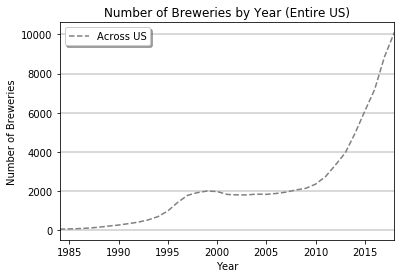

In [23]:
# Make a graph of total brewery growth over time
data_df

#Make and format plot
plt.plot(years, data_df.iloc[51, 1:], 'k--',  color = "grey", label = "Across US")

plt.hlines(0, 1984, 2020, alpha = 0.2)
plt.hlines(2000, 1984, 2020, alpha = 0.2)
plt.hlines(4000, 1984, 2020, alpha = 0.2)
plt.hlines(6000, 1984, 2020, alpha = 0.2)
plt.hlines(8000, 1984, 2020, alpha = 0.2)
plt.hlines(10000, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper left', 
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Breweries by Year (Entire US)")
plt.xlabel("Year")
plt.ylabel("Number of Breweries")
plt.xlim(1984, 2018)
plt.savefig("../Images/totalUS_breweries.png", bbox_inches='tight', dpi=300)
plt.show()



In [24]:
#import csv file of estimated population numbers by state from 2010-2018, as determined by Census
#available from https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk#
#data file is PEP_2018_PEPANNRES_with_ann.csv
#data from 2010 is from the 2010 census; the other years are population estimates from US Census.gov
state_pop0_df = pd.read_csv('../Raw Data Sources/PEP_2018_PEPANNRES_with_ann.csv', delimiter = ',',  encoding='utf-8')
state_pop0_df

#Clean up dataframe by resetting headers to values in row 0 and dropping row 0
state_pop0_df.columns = state_pop0_df.iloc[0]
state_pop0_df.columns
state_pop1_df = state_pop0_df.reindex(state_pop0_df.index.drop(0))
state_pop1_df
#drop rows indexed 1-5 (US pop, regional pop, Puerto Rico)
state_pop_df = state_pop1_df.drop([1,2,3,4,5,57])
#drop columns 0, 1, 4, 5 (Census ID #)
state_pop_df = state_pop_df.drop(["Id", "Id2", "April 1, 2010 - Estimates Base", "Population Estimate (as of July 1) - 2010"], axis=1)
state_pop_df
#Rename columns
state_pop_df = state_pop_df.rename(columns = {"Geography" : "State Pop", 
                                              "April 1, 2010 - Census" : "2010", 
                                              "Population Estimate (as of July 1) - 2011" : "2011",
                                              "Population Estimate (as of July 1) - 2012" : "2012",
                                              "Population Estimate (as of July 1) - 2013" : "2013",
                                              "Population Estimate (as of July 1) - 2014" : "2014",
                                              "Population Estimate (as of July 1) - 2015" : "2015",
                                              "Population Estimate (as of July 1) - 2016" : "2016",
                                              "Population Estimate (as of July 1) - 2017" : "2017",
                                              "Population Estimate (as of July 1) - 2018" : "2018"                                            
                                             })
#Sort by State name
state_pop_df = state_pop_df.sort_values("State Pop")
#reset index
state_pop_df = state_pop_df.reset_index(drop = True)

#Save as csv files in case group members want it
state_pop_df.to_csv(r'../Raw Data Sources/population_per_state_2010_2018_cleaned.csv')
state_pop_df.head()

,State Pop,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,4779736,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,Alaska,710231,722038,730399,737045,736307,737547,741504,739786,737438
2,Arizona,6392017,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
3,Arkansas,2915918,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
4,California,37253956,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [25]:
#Make new dataframe with brewery count per state, but only years 2010-2018
brew_ct_df.head()
brew_ct2_df = brew_ct_df.drop([1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], axis = 1)
brew_ct2_df = brew_ct2_df.rename(columns = {"State" : "State Breweries"})
brew_ct2_df
#Sort by State name
brew_ct2_df = brew_ct2_df.sort_values("State Breweries")
#reset index
brew_ct2_df = brew_ct2_df.reset_index(drop = True)
brew_ct2_df.head()

,State Breweries,State Code,Region,Division,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,AL,South,East South Central,7.0,9,15.0,23.0,25.0,30.0,37.0,52.0,55.0
1,Alaska,AK,West,Pacific,20.0,23,25.0,25.0,28.0,35.0,36.0,45.0,51.0
2,Arizona,AZ,West,Mountain,37.0,45,55.0,59.0,77.0,91.0,110.0,130.0,146.0
3,Arkansas,AR,South,West South Central,5.0,7,13.0,18.0,23.0,29.0,34.0,44.0,53.0
4,California,CA,West,Pacific,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0


In [26]:
#are the states in my 2 dataframes in the same order? Yes, the lists below are the same
# brew_ct2_df_name = brew_ct2_df.iloc[0:50, 0].values.tolist()
# brew_ct2_df_name

# state_pop_df_name = state_pop_df.iloc[0:50, 0].values.tolist()
#state_pop_df_name

#Need to change state_pop_df population data to float (brew_ct2_df data is already mostly float)
state_pop_df["2010"] = state_pop_df["2010"].astype(float)
state_pop_df["2011"] = state_pop_df["2011"].astype(float)
state_pop_df["2012"] = state_pop_df["2012"].astype(float)
state_pop_df["2013"] = state_pop_df["2013"].astype(float)
state_pop_df["2014"] = state_pop_df["2014"].astype(float)
state_pop_df["2015"] = state_pop_df["2015"].astype(float)
state_pop_df["2016"] = state_pop_df["2016"].astype(float)
state_pop_df["2017"] = state_pop_df["2017"].astype(float)
state_pop_df["2018"] = state_pop_df["2018"].astype(float)
brew_ct2_df[2011] = brew_ct2_df[2011].astype(float)
brew_ct2_df.dtypes

#Change headers to integer
state_pop_df.columns.map(type) #all strings
brew_ct2_df.columns.map(type) # s s s s i i i i i i i i i 
#Note that state_pop_df year headers are strings and brew_ct2_df year headers are integers
state_pop_df.dtypes
brew_ct2_df.columns = brew_ct2_df.columns.astype(str)
brew_ct2_df.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>],
      dtype='object')

In [27]:
#Calculate breweries/ 100,000 people in each state
brew_ct2_df["2010 B/P"] = (brew_ct2_df["2010"] / state_pop_df["2010"] *100000).round(1)
brew_ct2_df["2011 B/P"] = (brew_ct2_df["2011"] / state_pop_df["2011"] *100000).round(1)
brew_ct2_df["2012 B/P"] = (brew_ct2_df["2012"] / state_pop_df["2012"] *100000).round(1)
brew_ct2_df["2013 B/P"] = (brew_ct2_df["2013"] / state_pop_df["2013"] *100000).round(1)
brew_ct2_df["2014 B/P"] = (brew_ct2_df["2014"] / state_pop_df["2014"] *100000).round(1)
brew_ct2_df["2015 B/P"] = (brew_ct2_df["2015"] / state_pop_df["2015"] *100000).round(1)
brew_ct2_df["2016 B/P"] = (brew_ct2_df["2016"] / state_pop_df["2016"] *100000).round(1)
brew_ct2_df["2017 B/P"] = (brew_ct2_df["2017"] / state_pop_df["2017"] *100000).round(1)
brew_ct2_df["2018 B/P"] = (brew_ct2_df["2018"] / state_pop_df["2018"] *100000).round(1)

#Save new dataframe with just the breweries normalized to population and reset brew_ct2_df so it is back to its original state
brew_norm_pop_df = brew_ct2_df.drop(["2010","2011","2012","2013","2014","2015","2016","2017","2018", ], axis=1)
brew_ct2_df = brew_ct2_df.drop(["2010 B/P","2011 B/P","2012 B/P","2013 B/P","2014 B/P","2015 B/P","2016 B/P","2017 B/P","2018 B/P", ], axis=1)
brew_ct2_df.head()
#Save as csv files in case group members want it
brew_norm_pop_df.to_csv(r'../Raw Data Sources/breweries_norm_pop_2010_2018_cleaned.csv')

brew_norm_pop_sort_2018_df = brew_norm_pop_df.sort_values("2018 B/P", ascending = False)
brew_norm_pop_sort_2018_df.head()

,State Breweries,State Code,Region,Division,2010 B/P,2011 B/P,2012 B/P,2013 B/P,2014 B/P,2015 B/P,2016 B/P,2017 B/P,2018 B/P
45,Vermont,VT,Northeast,New England,5.1,5.4,6.2,7.2,8.2,10.6,11.7,13.5,14.4
19,Maine,ME,Northeast,New England,3.3,3.7,4.0,4.5,5.3,6.3,7.7,9.8,12.3
26,Montana,MT,West,Mountain,3.1,3.5,4.1,4.8,6.1,7.2,7.6,9.3,10.2
37,Oregon,OR,West,Pacific,3.1,3.8,4.6,5.6,6.2,7.0,7.4,8.4,9.2
5,Colorado,CO,West,Mountain,2.6,2.9,3.6,4.4,5.6,6.5,7.0,8.0,8.8


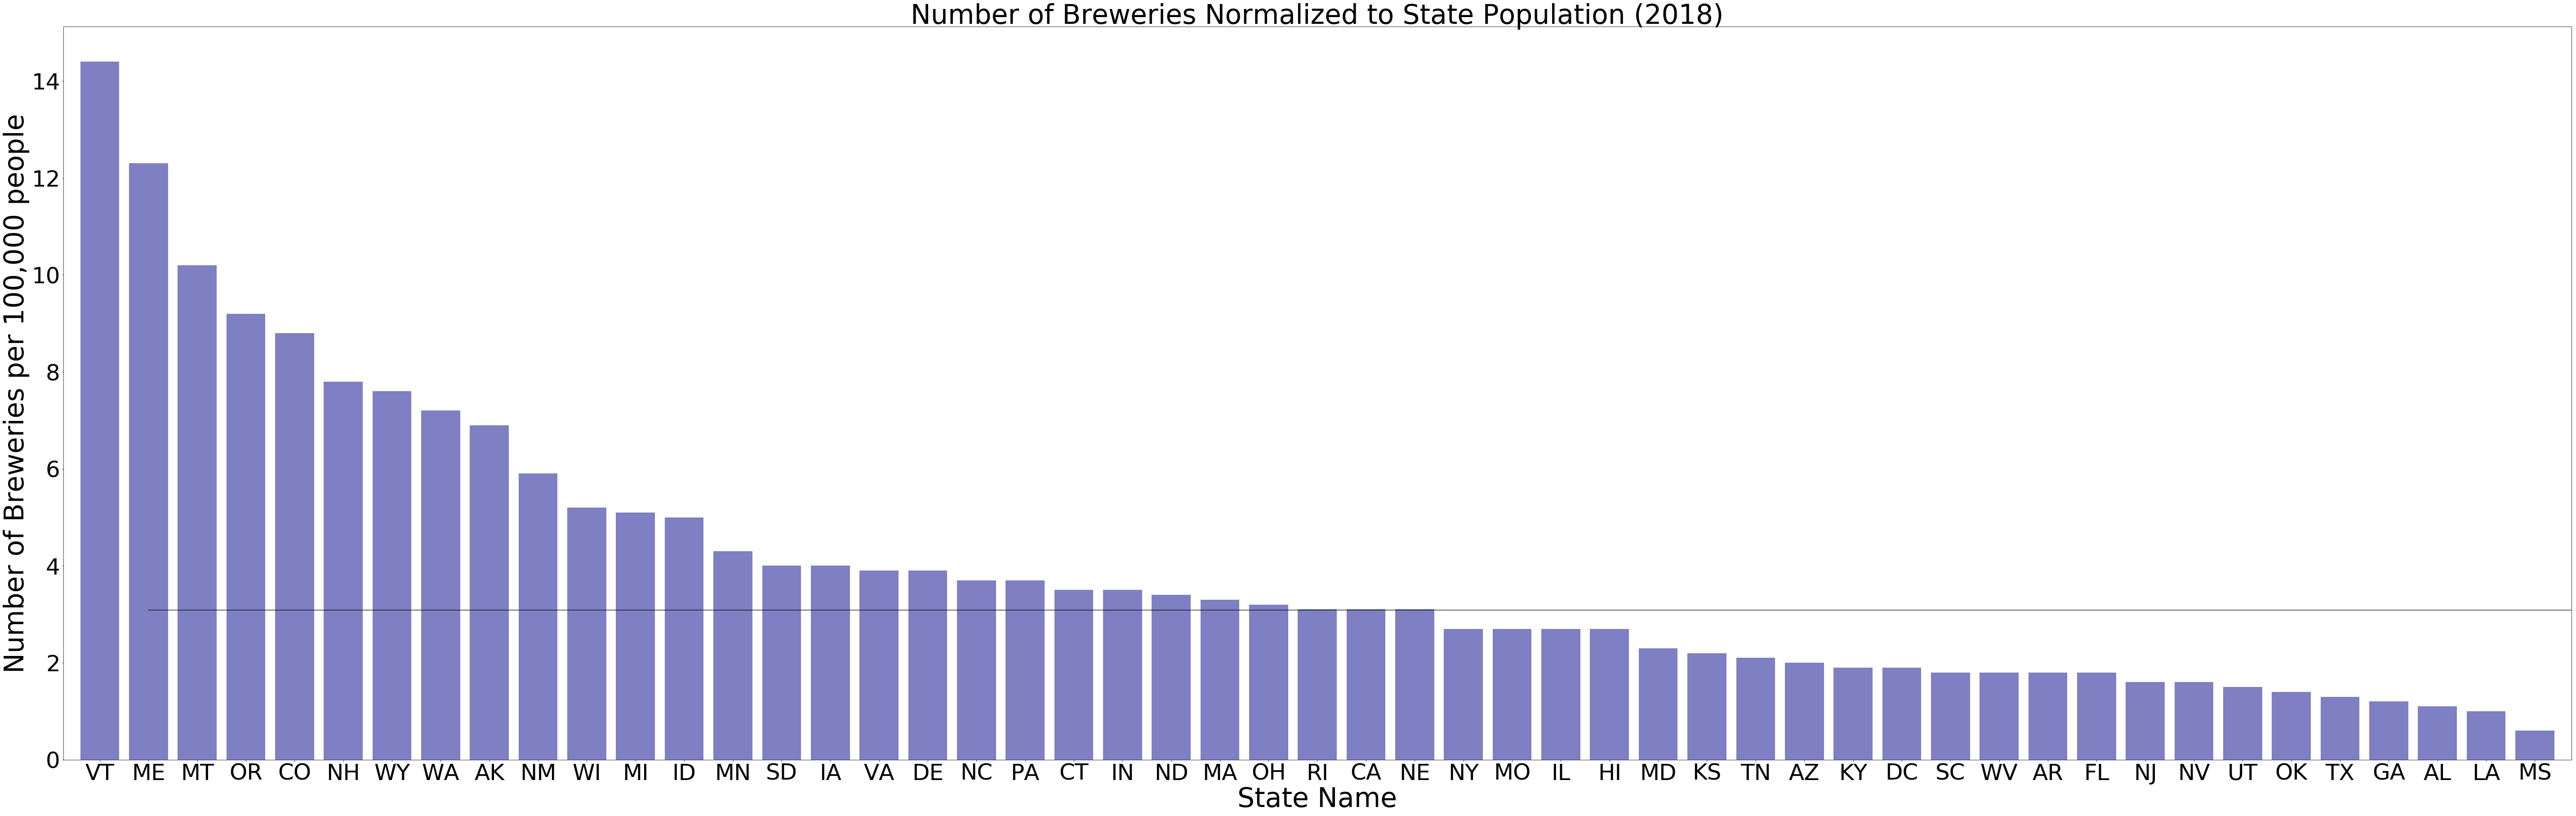

In [28]:
#Make a bar chart ordering states with the most breweries/ 100,000 people
#drop data frame down to essential columns
brew_norm_pop_sort_2018_df2 = brew_norm_pop_sort_2018_df[["State Code", "2018 B/P"]]
brew_norm_pop_sort_2018_df2 = brew_norm_pop_sort_2018_df2.rename(columns = {"State Code" : "State"})
brew_norm_pop_sort_2018_df2.head()

#Make and format bar chart
x_axis = np.arange(len(brew_norm_pop_sort_2018_df2))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (100, 30))

plt.bar(x_axis, brew_norm_pop_sort_2018_df2.iloc[:, 1], color = "darkblue", alpha = 0.5, align = "center")
plt.xticks(tick_loc, brew_norm_pop_sort_2018_df2["State"], fontsize=50)
plt.yticks(fontsize=50)
#Add horizontal line to mark the 2018 national average of breweries per 100,000 people, which is 3.09
plt.hlines(3.09, 1, 51, alpha = 0.8)

plt.xlabel("State Name", fontsize=60)
plt.ylabel("Number of Breweries per 100,000 people", fontsize=60)
plt.title("Number of Breweries Normalized to State Population (2018)", fontsize=60)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.savefig("../Images/breweries_norm_pop.png", bbox_inches='tight', dpi=300)

plt.show()

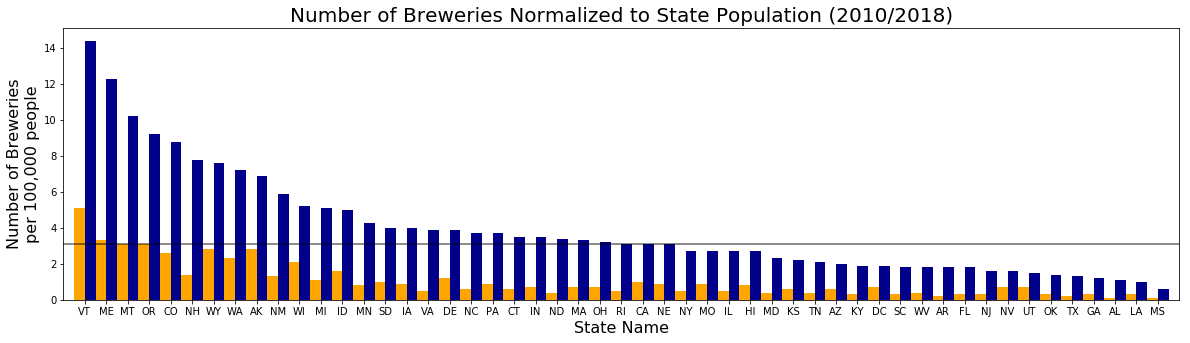

In [29]:
#Alternative bar chart showing the change in breweries (normalized to population) over the past 8 years
#drop data frame down to essential columns
brew_norm_pop_sort_2018_df4 = brew_norm_pop_sort_2018_df[["State Code", "2010 B/P", "2018 B/P"]]
brew_norm_pop_sort_2018_df4 = brew_norm_pop_sort_2018_df4.rename(columns = {"State Code" : "State"})
brew_norm_pop_sort_2018_df4.head()

x_axis = np.arange(len(brew_norm_pop_sort_2018_df4)) # set X locations
#new_x_axis = [2*i for i in x_axis]

width = 0.5 #set width of bar
num_2010_y = brew_norm_pop_sort_2018_df4.iloc[:, 1] # y values for 1st group
num_2018_y = brew_norm_pop_sort_2018_df4.iloc[:, 2] # y values for 2nd group

fig,ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x_axis, num_2010_y, width, color= "orange")
rects2 = ax.bar(x_axis + width, num_2018_y, width, color= "darkblue")

#Make and format bar chart
ax.set_xlabel("State Name", fontsize=16)
ax.set_ylabel("Number of Breweries\nper 100,000 people", fontsize=16)
ax.set_title("Number of Breweries Normalized to State Population (2010/2018)", fontsize=20)
ax.set_xticks(x_axis + width / 2)
ax.set_xticklabels(brew_norm_pop_sort_2018_df4.iloc[:, 0], fontsize = 10)
#Add horizontal line to mark the 2018 national average of breweries per 100,000 people, which is 3.09
plt.hlines(3.09, -2, 52, alpha = 0.6)
plt.xlim(-0.75, len(x_axis)+0.25)
plt.savefig("../Images/breweries_norm_pop_2010_2018.png", bbox_inches='tight', dpi=300)

plt.show()

In [30]:
#import csv file listing state name and land area in square miles.  
#data from https://www.census.gov/geo/reference/state-area.html
#file name us_state_land_area.csv
state_land_df = pd.read_csv('../Raw Data Sources/us_state_land_area.csv', delimiter = ',',  encoding='utf-8')

#Need to remove commas from numbers so I can convert them from string to float
state_land_df['Land Area'] = state_land_df['Land Area'].str.replace(',', '')

#Change Land area from str to float
state_land_df["Land Area"] = state_land_df["Land Area"].astype(float)
state_land_df.dtypes
state_land_df.head()

,State,Land Area
0,Alabama,50645.0
1,Alaska,570641.0
2,Arizona,113594.0
3,Arkansas,52035.0
4,California,155779.0


In [31]:
state_pop_df.head()

,State Pop,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,4779736.0,4798834.0,4815564.0,4830460.0,4842481.0,4853160.0,4864745.0,4875120.0,4887871.0
1,Alaska,710231.0,722038.0,730399.0,737045.0,736307.0,737547.0,741504.0,739786.0,737438.0
2,Arizona,6392017.0,6473497.0,6556629.0,6634999.0,6733840.0,6833596.0,6945452.0,7048876.0,7171646.0
3,Arkansas,2915918.0,2940407.0,2952109.0,2959549.0,2967726.0,2978407.0,2990410.0,3002997.0,3013825.0
4,California,37253956.0,37641823.0,37960782.0,38280824.0,38625139.0,38953142.0,39209127.0,39399349.0,39557045.0


In [32]:
#Calculate Population Density (PD) of each state by dividing state population by area in squared miles
state_pop_df["2010 PD"] = (state_pop_df["2010"] / state_land_df["Land Area"]).round(1)
state_pop_df["2011 PD"] = (state_pop_df["2011"] / state_land_df["Land Area"]).round(1)
state_pop_df["2012 PD"] = (state_pop_df["2012"] / state_land_df["Land Area"]).round(1)
state_pop_df["2013 PD"] = (state_pop_df["2013"] / state_land_df["Land Area"]).round(1)
state_pop_df["2014 PD"] = (state_pop_df["2014"] / state_land_df["Land Area"]).round(1)
state_pop_df["2015 PD"] = (state_pop_df["2015"] / state_land_df["Land Area"]).round(1)
state_pop_df["2016 PD"] = (state_pop_df["2016"] / state_land_df["Land Area"]).round(1)
state_pop_df["2017 PD"] = (state_pop_df["2017"] / state_land_df["Land Area"]).round(1)
state_pop_df["2018 PD"] = (state_pop_df["2018"] / state_land_df["Land Area"]).round(1)

#Save new dataframe with just the population density
state_pop_density_df = state_pop_df.drop(["2010","2011","2012","2013","2014","2015","2016","2017","2018", ], axis=1)

#Save as csv files in case group members want it
state_pop_density_df.to_csv(r'../Raw Data Sources/state_pop_density_2010_2018_cleaned.csv')
state_pop_density_df.head()

,State Pop,2010 PD,2011 PD,2012 PD,2013 PD,2014 PD,2015 PD,2016 PD,2017 PD,2018 PD
0,Alabama,94.4,94.8,95.1,95.4,95.6,95.8,96.1,96.3,96.5
1,Alaska,1.2,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3
2,Arizona,56.3,57.0,57.7,58.4,59.3,60.2,61.1,62.1,63.1
3,Arkansas,56.0,56.5,56.7,56.9,57.0,57.2,57.5,57.7,57.9
4,California,239.1,241.6,243.7,245.7,247.9,250.1,251.7,252.9,253.9


In [33]:
#Calculate Breweries (B) / 100 square miles of each state by dividing brewery count by area in squared miles
brew_ct2_df["2010 B/A"] = (brew_ct2_df["2010"] / state_land_df["Land Area"] * 100)
brew_ct2_df["2011 B/A"] = (brew_ct2_df["2011"] / state_land_df["Land Area"] * 100).round(1)
brew_ct2_df["2012 B/A"] = (brew_ct2_df["2012"] / state_land_df["Land Area"] * 100).round(1)
brew_ct2_df["2013 B/A"] = (brew_ct2_df["2013"] / state_land_df["Land Area"] * 100).round(1)
brew_ct2_df["2014 B/A"] = (brew_ct2_df["2014"] / state_land_df["Land Area"] * 100).round(1)
brew_ct2_df["2015 B/A"] = (brew_ct2_df["2015"] / state_land_df["Land Area"] * 100).round(1)
brew_ct2_df["2016 B/A"] = (brew_ct2_df["2016"] / state_land_df["Land Area"] * 100).round(1)
brew_ct2_df["2017 B/A"] = (brew_ct2_df["2017"] / state_land_df["Land Area"] * 100).round(1)
brew_ct2_df["2018 B/A"] = (brew_ct2_df["2018"] / state_land_df["Land Area"] * 100).round(1)


#Save new dataframe with just the breweries normalized to population
brew_norm_area_df = brew_ct2_df.drop(["2010","2011","2012","2013","2014","2015","2016","2017","2018"], axis=1)
brew_ct2_df = brew_ct2_df.drop(["2010 B/A","2011 B/A","2012 B/A","2013 B/A","2014 B/A","2015 B/A","2016 B/A","2017 B/A","2018 B/A" ], axis=1)
brew_norm_area_df.head()

#Save as csv files in case group members want it
brew_norm_area_df.to_csv(r'../Raw Data Sources/breweries_norm_area_2010_2018_cleaned.csv')
brew_norm_area_df.head()

,State Breweries,State Code,Region,Division,2010 B/A,2011 B/A,2012 B/A,2013 B/A,2014 B/A,2015 B/A,2016 B/A,2017 B/A,2018 B/A
0,Alabama,AL,South,East South Central,0.013822,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1
1,Alaska,AK,West,Pacific,0.003505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,AZ,West,Mountain,0.032572,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1
3,Arkansas,AR,South,West South Central,0.009609,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1
4,California,CA,West,Pacific,0.229813,0.3,0.3,0.3,0.4,0.5,0.6,0.7,0.8


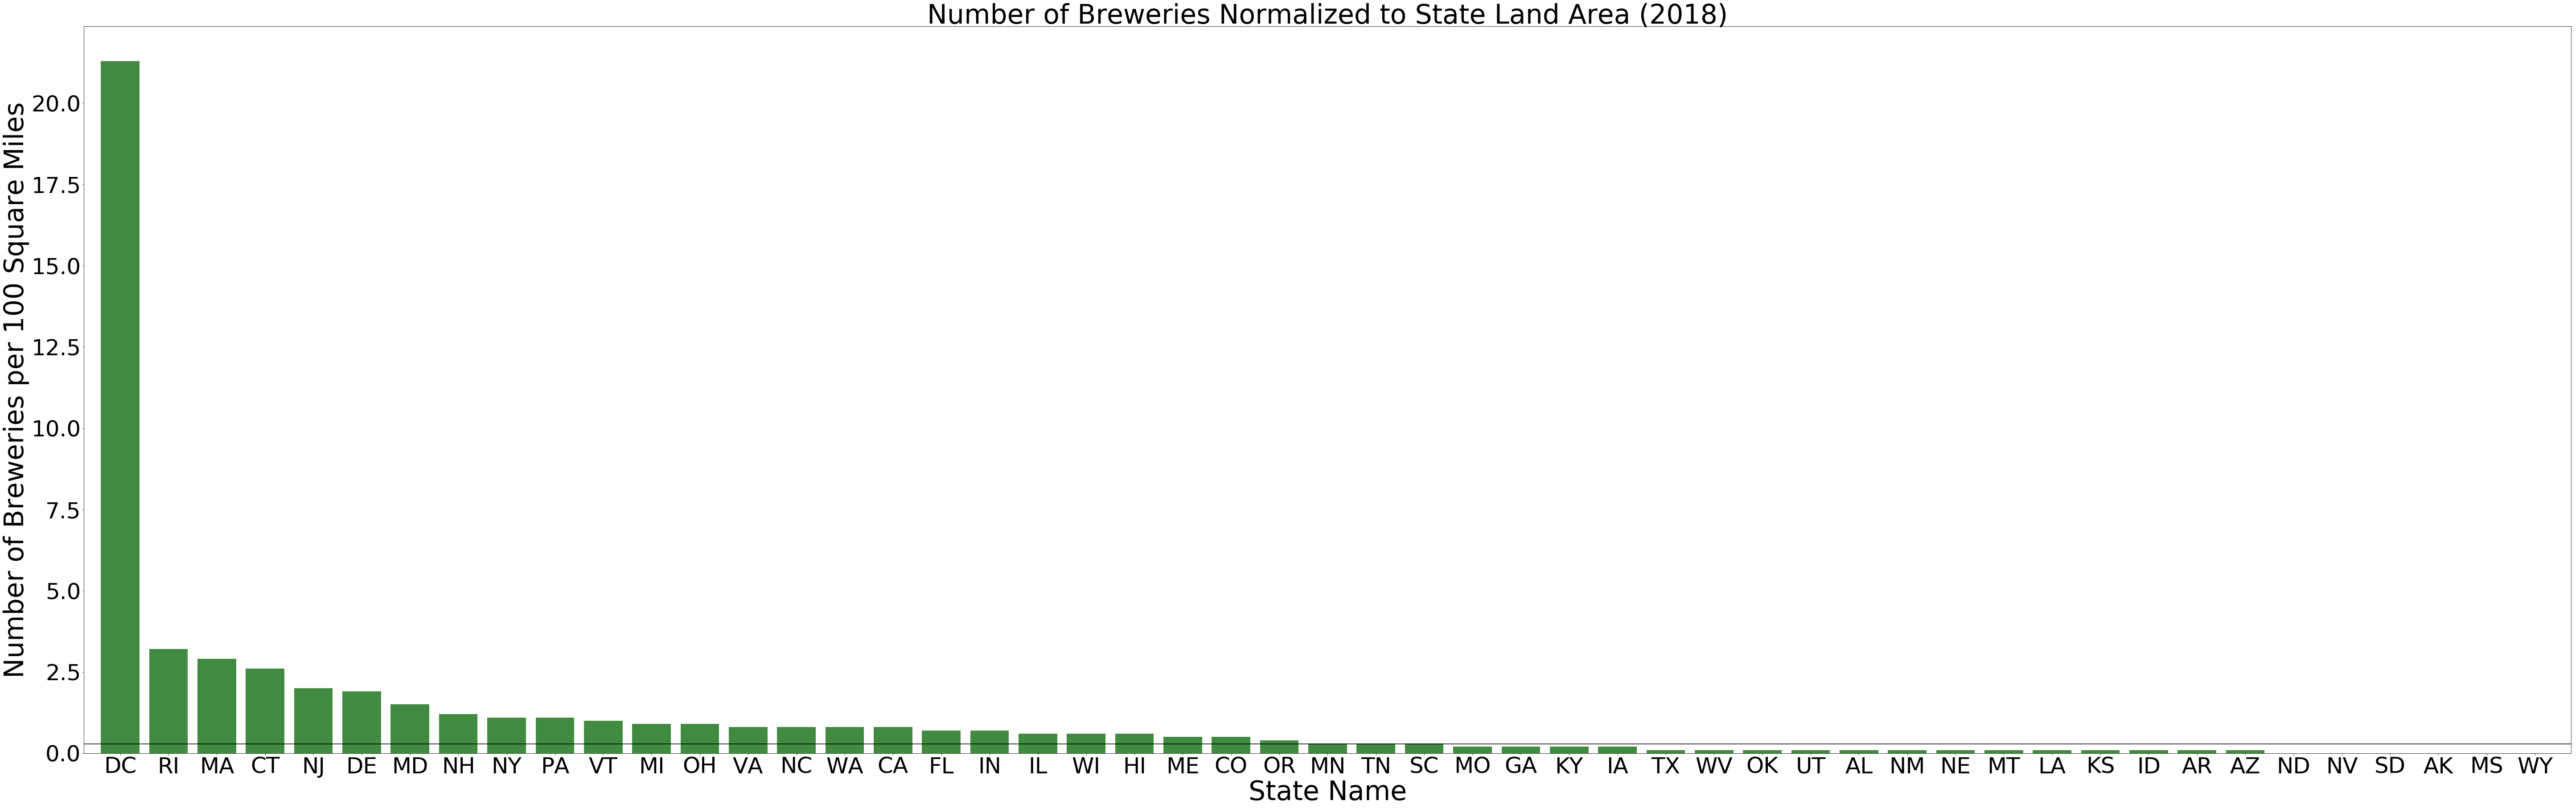

In [34]:
#Make a bar chart ordering states with the most breweries/ area (100 sq miles)
#Sort data by 2018 numbers
brew_norm_area_sort_2018_df = brew_norm_area_df.sort_values("2018 B/A", ascending = False)
brew_norm_area_sort_2018_df

#drop data frame down to essential columns
brew_norm_area_sort_2018_df2 = brew_norm_area_sort_2018_df[["State Code", "2018 B/A"]]
brew_norm_area_sort_2018_df2 = brew_norm_area_sort_2018_df2.rename(columns = {"State Code" : "State"})
brew_norm_area_sort_2018_df2.head()

#Make and format bar chart
x_axis = np.arange(len(brew_norm_pop_sort_2018_df2))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (100, 30))

plt.bar(x_axis, brew_norm_area_sort_2018_df2.iloc[:, 1], color = "darkgreen", alpha = 0.75, align = "center")
plt.xticks(tick_loc, brew_norm_area_sort_2018_df2["State"], fontsize=50)
plt.yticks(fontsize=50)
#Add horizontal line to mark the 2018 national average of breweries per 100 sq miles, which is 3.09
plt.hlines(0.286, -2, 51, alpha = 1)

plt.xlabel("State Name", fontsize=60)
plt.ylabel("Number of Breweries per 100 Square Miles", fontsize=60)
plt.title("Number of Breweries Normalized to State Land Area (2018)", fontsize=60)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.savefig("../Images/breweries_norm_area.png", bbox_inches='tight')

plt.show()
#This data might be a good set up to Bryan's data, as clearly these breweries aren't distributed every 100 miles.

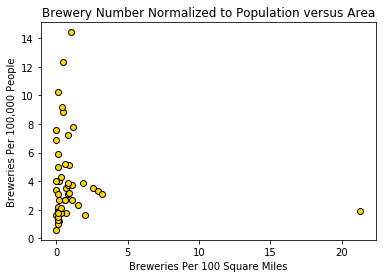

In [35]:
#Make a scatter plot of breweries/population (y) versus breweries/sq mile (x)
#Resort each dataframe of 2018 data by state name
brew_norm_area_sort_2018_df3 = brew_norm_area_sort_2018_df2.sort_values("State")
brew_norm_area_sort_2018_df3.head()  #Headers: State and 2018 B/A

brew_norm_pop_sort_2018_df3 = brew_norm_pop_sort_2018_df2.sort_values("State")
brew_norm_pop_sort_2018_df3.head() #Headers: State and 2018 B/P

x2_axis = brew_norm_area_sort_2018_df3["2018 B/A"]
y2_axis = brew_norm_pop_sort_2018_df3["2018 B/P"]
plt.title("Brewery Number Normalized to Population versus Area")
plt.xlabel("Breweries Per 100 Square Miles")
plt.ylabel("Breweries Per 100,000 People")

plt.scatter(x2_axis, y2_axis, marker = "o", facecolors = "gold", edgecolors = "black")
plt.savefig("../Images/Brewery_number_norm_popvsarea.png", bbox_inches='tight', dpi=300)

plt.show()

In [36]:
#Data on income and poverty level from the American Community Survey (ACS) via factfinder.census.gov
#Data files called ACS_17_5YR_DP03_with_ann.csv where first number is the year of the data (i.e. 17 is 2017)
#Data from 2010-2017; median inc is median household income ($); mean inc is mean household income; poverty is % of families below the poverty line
#Import csv file 
acs_17_long_df = pd.read_csv('../Raw Data Sources/ACS_17_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_17_long_df.head()

#Cleaning up dataframe: 
acs_17_df = acs_17_long_df[0:52] #Drop Puerto Rico Data
acs_17_df = acs_17_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_17_df.columns = acs_17_df.iloc[0] #resetting headers to values in row 0
acs_17_df = acs_17_df.reindex(acs_17_df.index.drop(0)) #dropping row 0
acs_17_df = acs_17_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)" : "Median inc (2017)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)" : "Mean inc (2017)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2017)",                                         
                                             })
acs_17_df.to_csv(r'../Raw Data Sources/ACS_17_cleaned.csv') #save simplified file as csv
acs_17_df.head()

#Repeat for other datasets (copy/paste if I can't do a function) ???
acs_16_long_df = pd.read_csv('../Raw Data Sources/ACS_16_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_16_df = acs_16_long_df[0:52] #Drop Puerto Rico Data
acs_16_df = acs_16_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_16_df.columns = acs_16_df.iloc[0] #resetting headers to values in row 0
acs_16_df = acs_16_df.reindex(acs_16_df.index.drop(0)) #dropping row 0
acs_16_df = acs_16_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)" : "Median inc (2016)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)" : "Mean inc (2016)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2016)",                                         
                                             })
acs_16_df.to_csv(r'../Raw Data Sources/ACS_16_cleaned.csv') #save simplified file as csv
acs_16_df.head()

acs_15_long_df = pd.read_csv('../Raw Data Sources/ACS_15_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_15_df = acs_15_long_df[0:52] #Drop Puerto Rico Data
acs_15_df = acs_15_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_15_df.columns = acs_15_df.iloc[0] #resetting headers to values in row 0
acs_15_df = acs_15_df.reindex(acs_15_df.index.drop(0)) #dropping row 0
acs_15_df = acs_15_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)" : "Median inc (2015)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)" : "Mean inc (2015)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2015)",                                         
                                             })
acs_15_df.to_csv(r'../Raw Data Sources/ACS_15_cleaned.csv') #save simplified file as csv
acs_15_df.head()

acs_14_long_df = pd.read_csv('../Raw Data Sources/ACS_14_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_14_df = acs_14_long_df[0:52] #Drop Puerto Rico Data
acs_14_df = acs_14_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_14_df.columns = acs_14_df.iloc[0] #resetting headers to values in row 0
acs_14_df = acs_14_df.reindex(acs_14_df.index.drop(0)) #dropping row 0
acs_14_df = acs_14_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)" : "Median inc (2014)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)" : "Mean inc (2014)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2014)",                                         
                                             })
acs_14_df.to_csv(r'../Raw Data Sources/ACS_14_cleaned.csv') #save simplified file as csv
acs_14_df.head()

acs_13_long_df = pd.read_csv('../Raw Data Sources/ACS_13_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_13_df = acs_13_long_df[0:52] #Drop Puerto Rico Data
acs_13_df = acs_13_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_13_df.columns = acs_13_df.iloc[0] #resetting headers to values in row 0
acs_13_df = acs_13_df.reindex(acs_13_df.index.drop(0)) #dropping row 0
acs_13_df = acs_13_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)" : "Median inc (2013)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)" : "Mean inc (2013)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2013)",                                         
                                             })
acs_13_df.to_csv(r'../Raw Data Sources/ACS_13_cleaned.csv') #save simplified file as csv
acs_13_df.head()

acs_12_long_df = pd.read_csv('../Raw Data Sources/ACS_12_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_12_df = acs_12_long_df[0:52] #Drop Puerto Rico Data
acs_12_df = acs_12_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_12_df.columns = acs_12_df.iloc[0] #resetting headers to values in row 0
acs_12_df = acs_12_df.reindex(acs_12_df.index.drop(0)) #dropping row 0
acs_12_df = acs_12_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)" : "Median inc (2012)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean household income (dollars)" : "Mean inc (2012)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2012)",                                         
                                             })
acs_12_df.to_csv(r'../Raw Data Sources/ACS_12_cleaned.csv') #save simplified file as csv
acs_12_df.head()

acs_11_long_df = pd.read_csv('../Raw Data Sources/ACS_11_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_11_df = acs_11_long_df[0:52] #Drop Puerto Rico Data
acs_11_df = acs_11_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_11_df.columns = acs_11_df.iloc[0] #resetting headers to values in row 0
acs_11_df = acs_11_df.reindex(acs_11_df.index.drop(0)) #dropping row 0
acs_11_df = acs_11_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)" : "Median inc (2011)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS) - Mean household income (dollars)" : "Mean inc (2011)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2011)",                                         
                                             })
acs_11_df.to_csv(r'../Raw Data Sources/ACS_11_cleaned.csv') #save simplified file as csv
acs_11_df.head()

acs_10_long_df = pd.read_csv('../Raw Data Sources/ACS_10_5YR_DP03_with_ann.csv', delimiter = ',',  encoding='utf-8')
acs_10_df = acs_10_long_df[0:52] #Drop Puerto Rico Data
acs_10_df = acs_10_df.iloc[ : , [2, 247, 251, 477]] #Pull out the data I want to use
acs_10_df.columns = acs_10_df.iloc[0] #resetting headers to values in row 0
acs_10_df = acs_10_df.reindex(acs_10_df.index.drop(0)) #dropping row 0
acs_10_df = acs_10_df.rename(columns = {"Geography" : "State", 
                                              "Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)" : "Median inc (2010)", 
                                              "Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean household income (dollars)" : "Mean inc (2010)",
                                              "Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families" : "Poverty (2010)",                                         
                                             })
acs_10_df.to_csv(r'../Raw Data Sources/ACS_10_cleaned.csv') #save simplified file as csv
acs_10_df.head()

# #How to do this as a function???
# def clean_csv (file_loc, new_name):
#     #acs_long_df = pd.read_csv(file_loc, delimiter = ',',  encoding='utf-8')
#     new_name = acs_long_df[0:52]
#     new_name = new_name.iloc[ : , [2, 247, 251, 477]]
      #add rest of the stuff above except columns names as those differ slightly for 2010, 2011, 2010
#     new_name.head()
#     return

# clean_csv('../Raw Data Sources/ACS_17_5YR_DP03_with_ann.csv', 'acs_17_df')
# acs_17_df.head()



,State,Median inc (2010),Mean inc (2010),Poverty (2010)
1,Alabama,42081,57655,13.0
2,Alaska,66521,82091,6.6
3,Arizona,50448,67436,10.9
4,Arkansas,39267,53253,13.5
5,California,60883,83483,10.2


In [37]:
#Merge all years into one df
acs_all_df = pd.merge(acs_10_df, acs_11_df, on = "State")
acs_all_df = pd.merge(acs_all_df, acs_12_df, on = "State")
acs_all_df = pd.merge(acs_all_df, acs_13_df, on = "State")
acs_all_df = pd.merge(acs_all_df, acs_14_df, on = "State")
acs_all_df = pd.merge(acs_all_df, acs_15_df, on = "State")
acs_all_df = pd.merge(acs_all_df, acs_16_df, on = "State")
acs_all_df = pd.merge(acs_all_df, acs_17_df, on = "State")
#Reorder columns
acs_all_df = acs_all_df[["State","Median inc (2010)","Median inc (2011)","Median inc (2012)","Median inc (2013)","Median inc (2014)","Median inc (2015)","Median inc (2016)","Median inc (2017)",
                        "Mean inc (2010)","Mean inc (2011)","Mean inc (2012)","Mean inc (2013)","Mean inc (2014)","Mean inc (2015)","Mean inc (2016)","Mean inc (2017)",
                         "Poverty (2010)","Poverty (2011)","Poverty (2012)","Poverty (2013)","Poverty (2014)","Poverty (2015)","Poverty (2016)","Poverty (2017)",
                        ]]

# Change median, mean, and percentage values from str to float using a for loop
for i in list(acs_all_df.columns)[1:len(acs_all_df.columns)]:
    acs_all_df[i] = acs_all_df[i].astype(float)

#Merge dataframes on State Code***
acs_all_df = pd.merge(state_region_df,acs_all_df, on = "State")

#Sort data by region
acs_all_df = acs_all_df.sort_values(["Region", "State Code"])
# Midwest (12), Northeast (9), South (17), West (13)

acs_all_df.head()

,State,State Code,Region,Division,Median inc (2010),Median inc (2011),Median inc (2012),Median inc (2013),Median inc (2014),Median inc (2015),...,Mean inc (2016),Mean inc (2017),Poverty (2010),Poverty (2011),Poverty (2012),Poverty (2013),Poverty (2014),Poverty (2015),Poverty (2016),Poverty (2017)
12,Iowa,IA,Midwest,West North Central,48872.0,50451.0,51129.0,51843.0,52716.0,53183.0,...,70708.0,73510.0,7.4,7.6,7.9,8.1,8.2,8.1,7.9,7.6
14,Illinois,IL,Midwest,East North Central,55735.0,56576.0,56853.0,56797.0,57166.0,57574.0,...,81865.0,85262.0,9.2,9.6,10.0,10.3,10.5,10.5,10.2,9.8
15,Indiana,IN,Midwest,East North Central,47697.0,48393.0,48374.0,48248.0,48737.0,49255.0,...,66480.0,69197.0,9.6,10.1,10.6,11.2,11.3,11.1,10.7,10.3
16,Kansas,KS,Midwest,West North Central,49424.0,50594.0,51273.0,51332.0,51872.0,52205.0,...,71975.0,74633.0,8.4,8.6,8.9,9.3,9.4,9.1,8.8,8.5
22,Michigan,MI,Midwest,East North Central,48432.0,48669.0,48471.0,48411.0,49087.0,49576.0,...,68928.0,72091.0,10.6,11.1,11.7,12.0,12.1,11.9,11.5,10.9


In [38]:
#Sort data by region
brew_ct2_df = brew_ct2_df.sort_values(["Region", "State Code"])
brew_ct2_df.head()

,State Breweries,State Code,Region,Division,2010,2011,2012,2013,2014,2015,2016,2017,2018
15,Iowa,IA,Midwest,West North Central,27.0,35.0,46.0,54.0,60.0,71.0,94.0,115.0,125.0
13,Illinois,IL,Midwest,East North Central,62.0,68.0,95.0,123.0,164.0,210.0,244.0,291.0,338.0
14,Indiana,IN,Midwest,East North Central,43.0,59.0,72.0,95.0,116.0,151.0,163.0,213.0,234.0
16,Kansas,KS,Midwest,West North Central,17.0,21.0,21.0,25.0,27.0,37.0,47.0,53.0,64.0
22,Michigan,MI,Midwest,East North Central,111.0,131.0,160.0,195.0,256.0,316.0,379.0,452.0,510.0


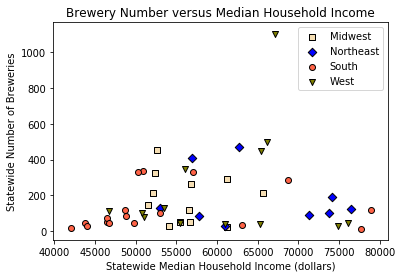

In [39]:
#Scatter plot of breweries per state (y) by MEDIAN income for 2017 (most recent data)
x3mw_axis = acs_all_df.iloc[0:12, 11]
y3mw_axis = brew_ct2_df.iloc[0:12, 11]
x3ne_axis = acs_all_df.iloc[12:21, 11]
y3ne_axis = brew_ct2_df.iloc[12:21, 11]
x3s_axis = acs_all_df.iloc[21:38, 11]
y3s_axis = brew_ct2_df.iloc[21:38, 11]
x3w_axis = acs_all_df.iloc[38:51, 11]
y3w_axis = brew_ct2_df.iloc[38:51, 11]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x3mw_axis, y3mw_axis, c='wheat', edgecolors = "black", marker="s", label='Midwest')
ax1.scatter(x3ne_axis,y3ne_axis, c='blue', edgecolors = "black", marker="D", label='Northeast')
ax1.scatter(x3s_axis,y3s_axis, c='tomato', edgecolors = "black", marker="o", label='South')
ax1.scatter(x3w_axis,y3w_axis, c='olive', edgecolors = "black", marker="v", label='West')
plt.title("Brewery Number versus Median Household Income")
plt.xlabel("Statewide Median Household Income (dollars)")
plt.ylabel("Statewide Number of Breweries")
plt.legend(loc='upper right');
plt.savefig("../Images/Brewery_number_norm_medianincome.png", bbox_inches='tight', dpi=300)

plt.show()

#Consider- can this graph be interactive to allow mouse to reveal which point is which state?

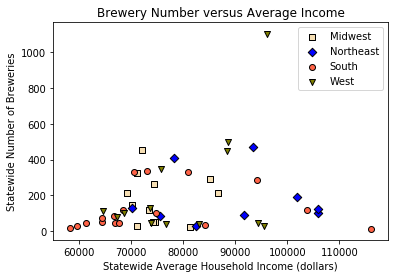

In [40]:
#Scatter plot of breweries per state (y) by MEAN income for 2017 (most recent data)
x3mwm_axis = acs_all_df.iloc[0:12, 19]
y3mwm_axis = brew_ct2_df.iloc[0:12, 11]
x3nem_axis = acs_all_df.iloc[12:21, 19]
y3nem_axis = brew_ct2_df.iloc[12:21, 11]
x3sm_axis = acs_all_df.iloc[21:38, 19]
y3sm_axis = brew_ct2_df.iloc[21:38, 11]
x3wm_axis = acs_all_df.iloc[38:51, 19]
y3wm_axis = brew_ct2_df.iloc[38:51, 11]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x3mwm_axis, y3mwm_axis, c='wheat', edgecolors = "black", marker="s", label='Midwest')
ax1.scatter(x3nem_axis,y3nem_axis, c='blue', edgecolors = "black", marker="D", label='Northeast')
ax1.scatter(x3sm_axis,y3sm_axis, c='tomato', edgecolors = "black", marker="o", label='South')
ax1.scatter(x3wm_axis,y3wm_axis, c='olive', edgecolors = "black", marker="v", label='West')
plt.title("Brewery Number versus Average Income")
plt.xlabel("Statewide Average Household Income (dollars)")
plt.ylabel("Statewide Number of Breweries")
plt.legend(loc='upper right');
plt.savefig("../Images/Brewery_number_norm_meanincome.png", bbox_inches='tight', dpi=300)

plt.show()

#Consider- can this graph be interactive to allow mouse to reveal which point is which state?

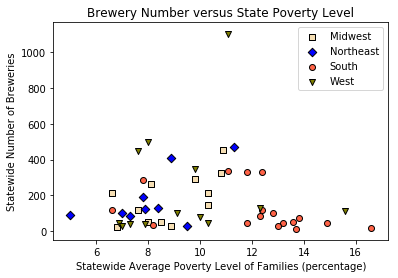

In [41]:
#Scatter plot of breweries per state (y) by poverty level for 2017 (most recent data)
x3mwp_axis = acs_all_df.iloc[0:12, 27]
y3mwp_axis = brew_ct2_df.iloc[0:12, 11]
x3nep_axis = acs_all_df.iloc[12:21, 27]
y3nep_axis = brew_ct2_df.iloc[12:21, 11]
x3sp_axis = acs_all_df.iloc[21:38, 27]
y3sp_axis = brew_ct2_df.iloc[21:38, 11]
x3wp_axis = acs_all_df.iloc[38:51, 27]
y3wp_axis = brew_ct2_df.iloc[38:51, 11]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x3mwp_axis, y3mwp_axis, c='wheat', edgecolors = "black", marker="s", label='Midwest')
ax1.scatter(x3nep_axis,y3nep_axis, c='blue', edgecolors = "black", marker="D", label='Northeast')
ax1.scatter(x3sp_axis,y3sp_axis, c='tomato', edgecolors = "black", marker="o", label='South')
ax1.scatter(x3wp_axis,y3wp_axis, c='olive', edgecolors = "black", marker="v", label='West')
plt.title("Brewery Number versus State Poverty Level")
plt.xlabel("Statewide Average Poverty Level of Families (percentage)")
plt.ylabel("Statewide Number of Breweries")
plt.legend(loc='upper right');
plt.savefig("../Images/Brewery_number_norm_poverty.png", dpi=300)

plt.show()

#Consider- can this graph be interactive to allow mouse to reveal which point is which state?

In [ ]:
# Data from https://www.ttb.gov/beer/beer-stats.shtml
# Includes Data for 2007-2017
# Brewery is binned by number of barrels produced by the brewery in that year
# So some shifting of numbers between catagories could be due to scaling 
# production up or down, rather than breweries closing or opening
# Brewery type definitions are from https://www.brewersassociation.org/statistics/market-segments/

#Import CSV breweries_binned_by_production.csv
brewery_bin_df = pd.read_csv('../Raw Data Sources/breweries_binned_by_production.csv', delimiter = ',',  encoding='utf-8')
#Drop last 3 rows with no data
brewery_bin_df = brewery_bin_df[0:11]
#Need to remove commas from numbers so I can convert them from string to float
brewery_bin_df['No of Breweries 2007'] = brewery_bin_df['No of Breweries 2007'].str.replace(',', '')
brewery_bin_df['No of Breweries 2008'] = brewery_bin_df['No of Breweries 2008'].str.replace(',', '')
brewery_bin_df['No of Breweries 2009'] = brewery_bin_df['No of Breweries 2009'].str.replace(',', '')
brewery_bin_df['No of Breweries 2010'] = brewery_bin_df['No of Breweries 2010'].str.replace(',', '')
brewery_bin_df['No of Breweries 2011'] = brewery_bin_df['No of Breweries 2011'].str.replace(',', '')
brewery_bin_df['No of Breweries 2012'] = brewery_bin_df['No of Breweries 2012'].str.replace(',', '')
brewery_bin_df['No of Breweries 2013'] = brewery_bin_df['No of Breweries 2013'].str.replace(',', '')
brewery_bin_df['No of Breweries 2014'] = brewery_bin_df['No of Breweries 2014'].str.replace(',', '')
brewery_bin_df['No of Breweries 2015'] = brewery_bin_df['No of Breweries 2015'].str.replace(',', '')
brewery_bin_df['No of Breweries 2016'] = brewery_bin_df['No of Breweries 2016'].str.replace(',', '')
brewery_bin_df['No of Breweries 2017'] = brewery_bin_df['No of Breweries 2017'].str.replace(',', '')

#change years to integer
for i in list(brewery_bin_df.columns)[2:len(brewery_bin_df.columns)]:
    brewery_bin_df[i] = brewery_bin_df[i].astype(int)
brewery_bin_df

In [ ]:
# Make line plot showing growth of breweries over time, split by production sie
# x axis:
iyear2 = 2007
years2 = []
for i in range(11):
    iyear2 = 2007 + i
    years2.append(iyear2)
years2


#Make and format plot
plt.plot(years2, brewery_bin_df.iloc[0, 2:], 'k-',  color = "green", label = "6 mill +")
plt.plot(years2, brewery_bin_df.iloc[1, 2:], 'k-',  color = "sienna", label = "1 mill to 6 mill ")
plt.plot(years2, brewery_bin_df.iloc[2, 2:], 'k-',  color = "crimson", label = "0.5 mill to 1 mill")
plt.plot(years2, brewery_bin_df.iloc[3, 2:], 'k-',  color = "orange", label = "100,001 to 500,000")
plt.plot(years2, brewery_bin_df.iloc[4, 2:], 'k-',  color = "gold", label = "60,001 to 100,000")
plt.plot(years2, brewery_bin_df.iloc[5, 2:], 'k-',  color = "aqua", label = "30,001 to 60,000")
plt.plot(years2, brewery_bin_df.iloc[6, 2:], 'k-',  color = "teal", label = "15,001 to 30,000")
plt.plot(years2, brewery_bin_df.iloc[7, 2:], 'k-',  color = "navy", label = "7,501 to 15,000")
plt.plot(years2, brewery_bin_df.iloc[8, 2:], 'k-',  color = "indigo", label = "1,001 to 7,500")
plt.plot(years2, brewery_bin_df.iloc[9, 2:], 'k-',  color = "salmon", label = "1,000 or less")
plt.plot(years2, brewery_bin_df.iloc[10, 2:], 'k--',  color = "grey", label = "All Breweries")

# plt.hlines(100, 1984, 2020, alpha = 0.2)
# plt.hlines(200, 1984, 2020, alpha = 0.2)
# plt.hlines(300, 1984, 2020, alpha = 0.2)
# plt.hlines(400, 1984, 2020, alpha = 0.2)
# plt.hlines(500, 1984, 2020, alpha = 0.2)

plt.legend(loc='upper center', bbox_to_anchor=(0.48, -0.15),
           ncol=3, fancybox=True, shadow=True)
plt.title("Brewery Number by year, Binned by Brewery Production")
plt.xlabel("Year")
plt.ylabel("Number of Breweries \nin Production Category")
plt.xlim(2007, 2017)
plt.savefig("../Images/binned_brewery_growth_raw.png", bbox_inches='tight', dpi=300)
plt.show()

#This plot isn't showing the data in a clear way as the sizes of each group is so different
#Need to normalize data.  Alter to percent growth? Show as a stacked bar chart of percent of total

In [ ]:
brewery_bin_df

In [ ]:
# Calculate the percent 
#Import CSV breweries_binned_by_4productioncatagories.csv
brewery_bin2_df = pd.read_csv('../Raw Data Sources/breweries_binned_by_4productioncatagories.csv', delimiter = ',',  encoding='utf-8')
brewery_bin2_df

#Recalculate that the % of total Breweries?
#mean_survival_df['X'] = mean_survival_df['Survivors in Capomulin']/mean_survival_df.loc[0,'Survivors in Capomulin']

#Make a stacked bar chart of the 4 catagories
#fig,ax = plt.subplots(figsize=(20,5))

N = 11
x_axis = np.arange(N) # set X locations
plt.figure(figsize = (8, 10))

width = 0.5 #set width of bar
lg_brew_y = brewery_bin2_df.iloc[0, 1:12] # y values for 1st group
lg_brew_y2 = lg_brew_y.values.tolist()
reg_brew_y = brewery_bin2_df.iloc[1, 1:12]
reg_brew_y2 = reg_brew_y.values.tolist()

micro_brew_y = brewery_bin2_df.iloc[2, 1:12]
micro_brew_y2 = micro_brew_y.values.tolist()

nano_brew_y = brewery_bin2_df.iloc[3, 1:12]
nano_brew_y2 = nano_brew_y.values.tolist()
#For stacked bar chart: syntax "bottom =" sets up the order of the stacks within the bar
p1 = plt.bar(x_axis, lg_brew_y2, width, color = "red")
p2 = plt.bar(x_axis, reg_brew_y2, width,
             bottom=[lg_brew_y2[j] for j in range(11)], color = "olive", alpha = 0.7)
p3 = plt.bar(x_axis, micro_brew_y2, width,
             bottom=[lg_brew_y2[j] + reg_brew_y2[j] for j in range(11)], color = "orange")
p4 = plt.bar(x_axis, nano_brew_y2, width,
             bottom=[lg_brew_y2[j] + reg_brew_y2[j] + micro_brew_y2[j] for j in range(11)], color = "teal")
plt.hlines(1000, -1, 11, alpha = 0.2)
plt.hlines(2000, -1, 11, alpha = 0.2)
plt.hlines(3000, -1, 11, alpha = 0.2)
plt.hlines(4000, -1, 11, alpha = 0.2)
plt.hlines(5000, -1, 11, alpha = 0.2)

plt.xlim(-0.75, len(x_axis)-0.25)


plt.ylabel('Number of Breweries')
plt.title('Growth by Brewery Production Size')
plt.xticks(x_axis, ('2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
plt.yticks(np.arange(0, 6000, 500))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Large Brewery', 'Regional Brewery', 'Microbrewery', 'Nanobrewery'))
plt.savefig("../Images/binned_brewery_production_growth.png", bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
#Pie Chart showing the amount of production from each brewery group (binned by production)
#Shows production market share; 2007 data

Brewery_subclass = ['Large Brewery (84.9%)', 'Regional Brewery (14.2%)', 'Microbrewery (0.6%)', 'Nanobrewery (0.3%)']
Production_2007 = [brewery_bin2_df.iloc[0, 12], brewery_bin2_df.iloc[1, 12], brewery_bin2_df.iloc[2, 12], brewery_bin2_df.iloc[3, 12]]
colors = ["red", "olive", "orange", "teal"]
trans = [0, 0, 0, 0.7]
plt.pie(Production_2007, colors = colors)
plt.title("2007 Production Share per Brewery Type")
patches, texts = plt.pie(Production_2007, colors=colors, startangle=90)
plt.legend(patches, Brewery_subclass, loc="lower left")
plt.axis('equal')
plt.savefig("../Images/binned_brewery_production_pie_2007.png", bbox_inches='tight', dpi=300, transparent=True)

plt.show()

In [ ]:
#Pie Chart showing the amount of production from each brewery group (binned by production)
#Shows production market share; 2007 data

Brewery_subclass2 = ['Large Brewery (73.1%)', 'Regional Brewery (24.1%)', 'Microbrewery (2.2%)', 'Nanobrewery (0.6%)']
Production_2017 = [brewery_bin2_df.iloc[0, 13], brewery_bin2_df.iloc[1, 13], brewery_bin2_df.iloc[2, 13], brewery_bin2_df.iloc[3, 13]]
colors = ["red", "olive", "orange", "teal"]
plt.pie(Production_2017, colors = colors)
plt.title("2017 Production Share per Brewery Type")
patches, texts = plt.pie(Production_2017, colors=colors, startangle=90)
plt.legend(patches, Brewery_subclass2, loc="lower left")
plt.axis('equal')
plt.savefig("../Images/binned_brewery_production_pie_2017.png", bbox_inches='tight', dpi=300, transparent=True)

plt.show()

In [ ]:
brewery_bin2_df

## Calculating percentage change in breweries between 1990/2009 & 2009/2019


In [3]:
#pull in csv file with brewery counts per state
brewcount_csv = "../Raw Data Sources/brewery_per_state_cleaned.csv"
brewcount_df = pd.read_csv(brewcount_csv)

In [17]:
#calculate count change between 1990/2009 and 2009/2018
stateindexed = brewcount_df.set_index("State Code")
stateindexed_clean = stateindexed[["1990","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]]
stateindexed_clean.head()
count1990 = stateindexed_clean["1990"]
count2009 = stateindexed_clean["2009"]
count2018 = stateindexed_clean["2018"]

for state in stateindexed_clean:
    countchg1 = count2009 - count1990
    countchg2 = count2018 - count2009

stateindexed_clean["# Change (1990-2009)"] = countchg1
stateindexed_clean["# Change (2009-2018)"] = countchg2
count_sort = stateindexed_clean.sort_values(["# Change (1990-2009)"], ascending=False)
count_sort.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,1990,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,# Change (1990-2009),# Change (2009-2018)
State Code,,,,,,,,,,,,,
CA,67,340,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0,273,896.0
WA,10,138,157.0,188,230.0,266.0,314.0,383.0,424.0,499.0,540.0,128,402.0
CO,11,116,129.0,149,185.0,234.0,300.0,352.0,386.0,448.0,500.0,105,384.0
MI,3,104,111.0,131,160.0,195.0,256.0,316.0,379.0,452.0,510.0,101,406.0
WI,17,108,119.0,126,146.0,146.0,168.0,189.0,217.0,261.0,303.0,91,195.0


In [18]:
#create df with 2009-2018 change
count_sort2 = stateindexed_clean.sort_values(["# Change (2009-2018)"], ascending=False)
count_sort2.head()

,1990,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,# Change (1990-2009),# Change (2009-2018)
State Code,,,,,,,,,,,,,
CA,67,340,358.0,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0,273,896.0
NY,8,84,100.0,123,150.0,193.0,255.0,329.0,394.0,471.0,532.0,76,448.0
MI,3,104,111.0,131,160.0,195.0,256.0,316.0,379.0,452.0,510.0,101,406.0
WA,10,138,157.0,188,230.0,266.0,314.0,383.0,424.0,499.0,540.0,128,402.0
CO,11,116,129.0,149,185.0,234.0,300.0,352.0,386.0,448.0,500.0,105,384.0


In [20]:
#lists to hold percent changes from 1990-2009 and 2009-2019
chg90to09 = []
chg09to18 = []
ninety = stateindexed['1990']
ohnine = stateindexed['2009']
eighteen = stateindexed['2018']
#calculate percent change of both timeframes for each state
for state in stateindexed:
    chg90to09 = (((ohnine - ninety)/ninety)*100)
    chg09to18 = (((eighteen - ohnine)/ohnine)*100)
stateindexed["90-09 Change"] = chg90to09
stateindexed["09-18 Change"] = chg09to18
new_state_df = stateindexed.sort_values(["90-09 Change"], ascending=True)
new_state_df.head()

,Unnamed: 0,State,Region,Division,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,90-09 Change,09-18 Change
State Code,,,,,,,,,,,,,,,,,,,,,
AZ,3,Arizona,West,Mountain,0,0,0,0,0,6,...,45,55.0,59.0,77.0,91.0,110.0,130.0,146.0,325.000000,329.411765
CA,4,California,West,Pacific,9,12,15,23,39,50,...,401,472.0,528.0,654.0,788.0,927.0,1106.0,1236.0,407.462687,263.529412
OR,37,Oregon,West,Pacific,0,3,5,8,13,15,...,148,180.0,220.0,244.0,281.0,304.0,347.0,386.0,414.285714,257.407407
MN,23,Minnesota,Midwest,West North Central,0,0,3,4,5,7,...,56,70.0,75.0,113.0,142.0,165.0,214.0,239.0,457.142857,512.820513
TX,43,Texas,South,West South Central,4,4,4,4,5,7,...,84,107.0,128.0,170.0,220.0,266.0,333.0,387.0,487.500000,723.404255


In [4]:
! ls ..



Images              MAIN PROJECT FOLDER Project notes       Raw Data Sources
Lauren              Project Code        README.md           Stephen's code


In [5]:
cd ../Lauren/

/Users/bryanwood/Desktop/Project_1_Team_2/Lauren


In [6]:
# Pull in all information from Tax and Trade Bureau aggregated statistics
read_pdf("revised-aggr-data-beer-2007-2017.pdf", pages='all')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,ALCOHOL AND TOBACCO TAX AND TRADE BUREAU,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,TAX DETERMINED (In Barrels)*,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Beer removed for consumption or sale including...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,removed tax determined for consumption or sale,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,in a tavern or on brewery premises,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,23-Mar-18,NaN,NaN,NaN,NaN
5,STATE,2007,2008,2009,2010,2011 2012 2013,2014,2015**,2016**,2017**
6,AK,"2,415.76","2,067.69","2,263.65","1,929.15","2,251.02 2,312.43 2,155.60","2,114.97","4,511.48","13,315.93","15,649.51"
7,AL,658.60,723.53,238.60,161.24,0.00 46.50 130.55,226.25,"6,109.99","23,810.78","27,651.36"
8,AR,"1,246.00","1,328.35","1,279.34","1,331.85","1,124.98 1,265.93 558.14",657.12,"1,609.38","6,091.89","9,499.40"
9,AZ,"15,668.09","14,857.81","15,640.69","16,800.24","19,897.83 19,165.96 18,763.52","17,173.00","29,869.10","41,613.95","43,712.65"


In [7]:
# Convert the dataframe into a csv
convert_into(input_path="revised-aggr-data-beer-2007-2017.pdf", output_path="revised-aggr-data-beer-2007-2017.csv",
             output_format='csv', pages='all')
!cat revised-aggr-data-beer-2007-2017.csv

In [8]:
# Grab the first page
convert_into(input_path="revised-aggr-data-beer-2007-2017.pdf", output_path="revised-aggr-data-beer-2007-2017_1.csv",
             output_format='csv', pages='1')
!cat revised-aggr-data-beer-2007-2017_1.csv

In [9]:
# Grab the second page
convert_into(input_path="revised-aggr-data-beer-2007-2017.pdf", output_path="revised-aggr-data-beer-2007-2017_2.csv",
             output_format='csv', pages='2')
!cat revised-aggr-data-beer-2007-2017_2.csv

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

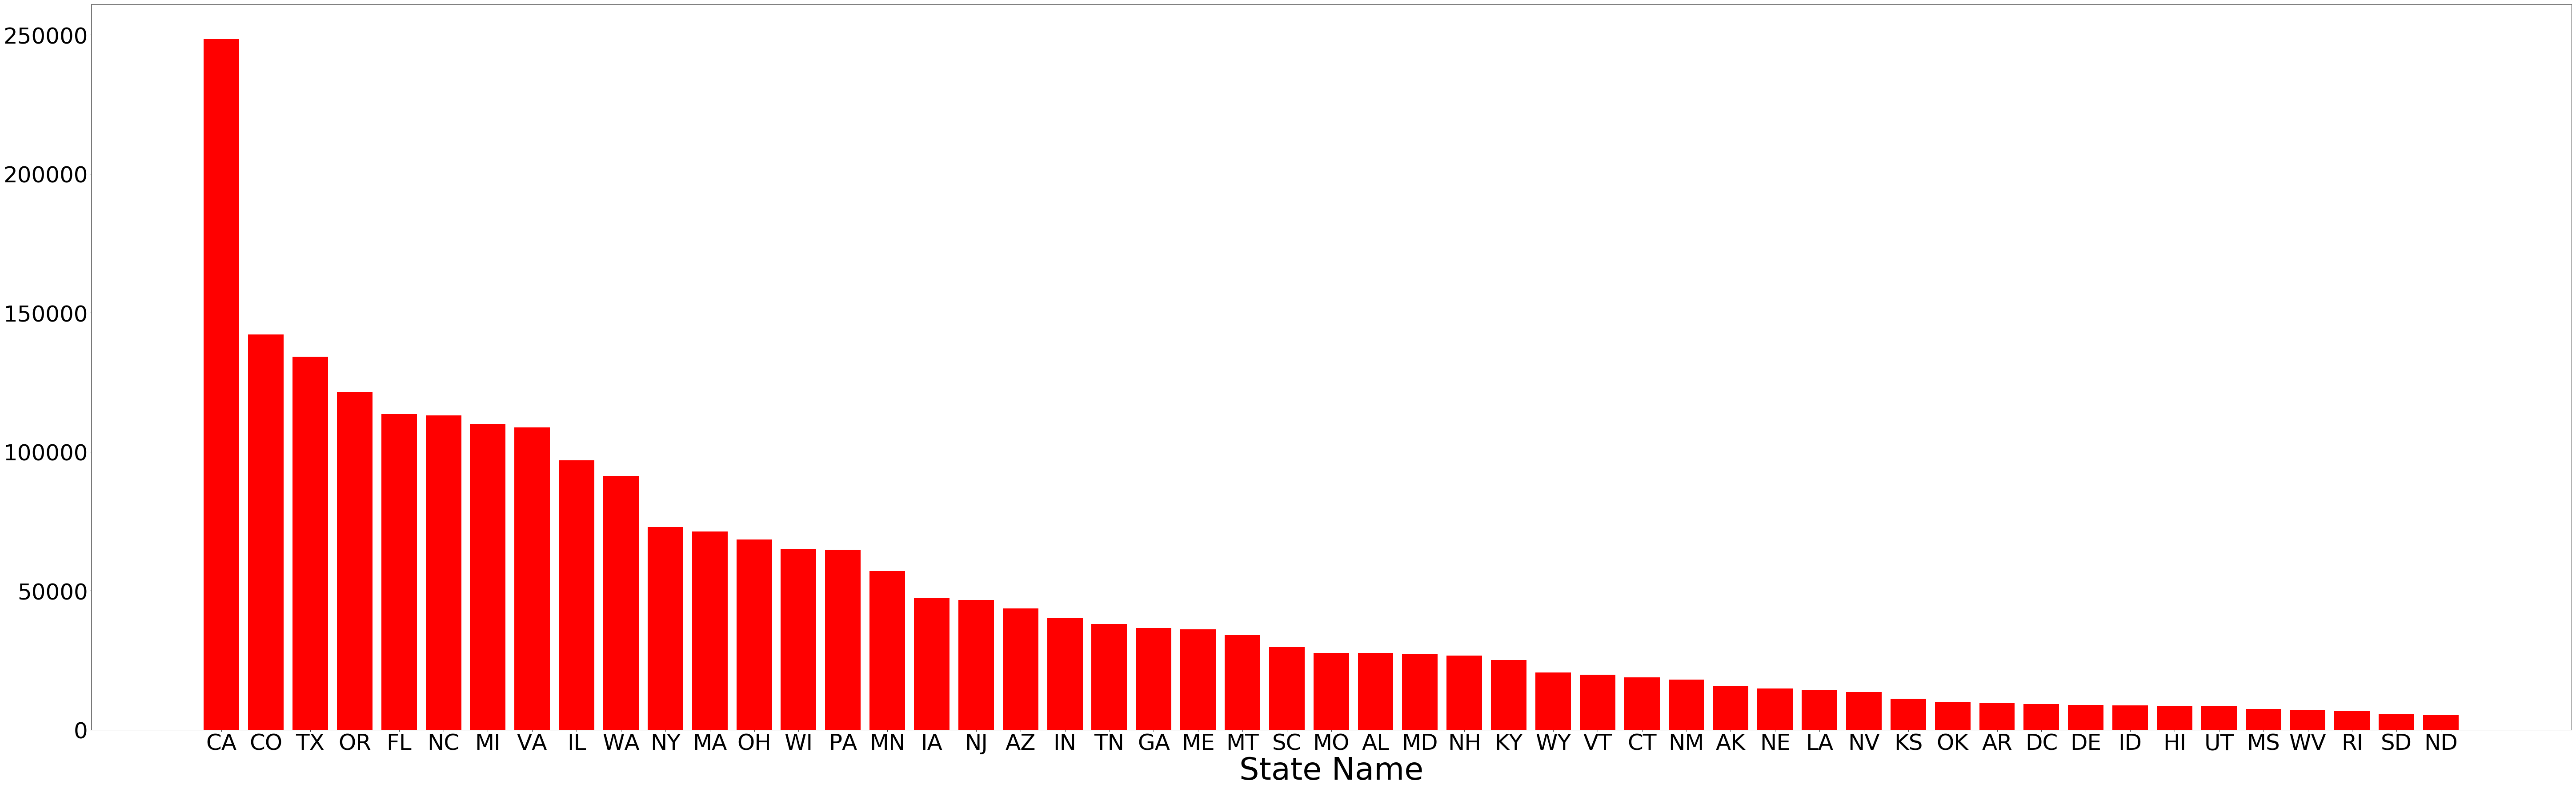

In [10]:
# Pull in csv and remove commas
stores1 = pd.read_csv("./revised-aggr-data-beer-2007-2017_stores.csv", thousands=',').fillna(0)
stores = stores1.loc[stores1['State']!='total']

# Convert values from string to integer
stores["2007_stores"] = pd.to_numeric(stores["2007_stores"])
stores["2008_stores"] = pd.to_numeric(stores["2008_stores"])
stores["2009_stores"] = pd.to_numeric(stores["2009_stores"])
stores["2010_stores"] = pd.to_numeric(stores["2010_stores"])
stores["2011_stores"] = pd.to_numeric(stores["2011_stores"])
stores["2012_stores"] = pd.to_numeric(stores["2012_stores"])
stores["2013_stores"] = pd.to_numeric(stores["2013_stores"])
stores["2014_stores"] = pd.to_numeric(stores["2014_stores"])
stores["2015_stores"] = pd.to_numeric(stores["2015_stores"])
stores["2016_stores"] = pd.to_numeric(stores["2016_stores"])
stores["2017_stores"] = pd.to_numeric(stores["2017_stores"])

stores_sort = stores.sort_values("2017_stores", ascending=False)
stores_sort_2017 = stores_sort[['State', '2017_stores']]

x_axis = np.arange(len(stores_sort_2017))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (100, 30))

plt.bar(x_axis, stores_sort_2017.iloc[:, 1], color='red')
plt.xlabel("State Name", fontsize=70)
plt.xticks(tick_loc, stores_sort_2017["State"], fontsize=50)
plt.yticks(fontsize=50)
plt.show()

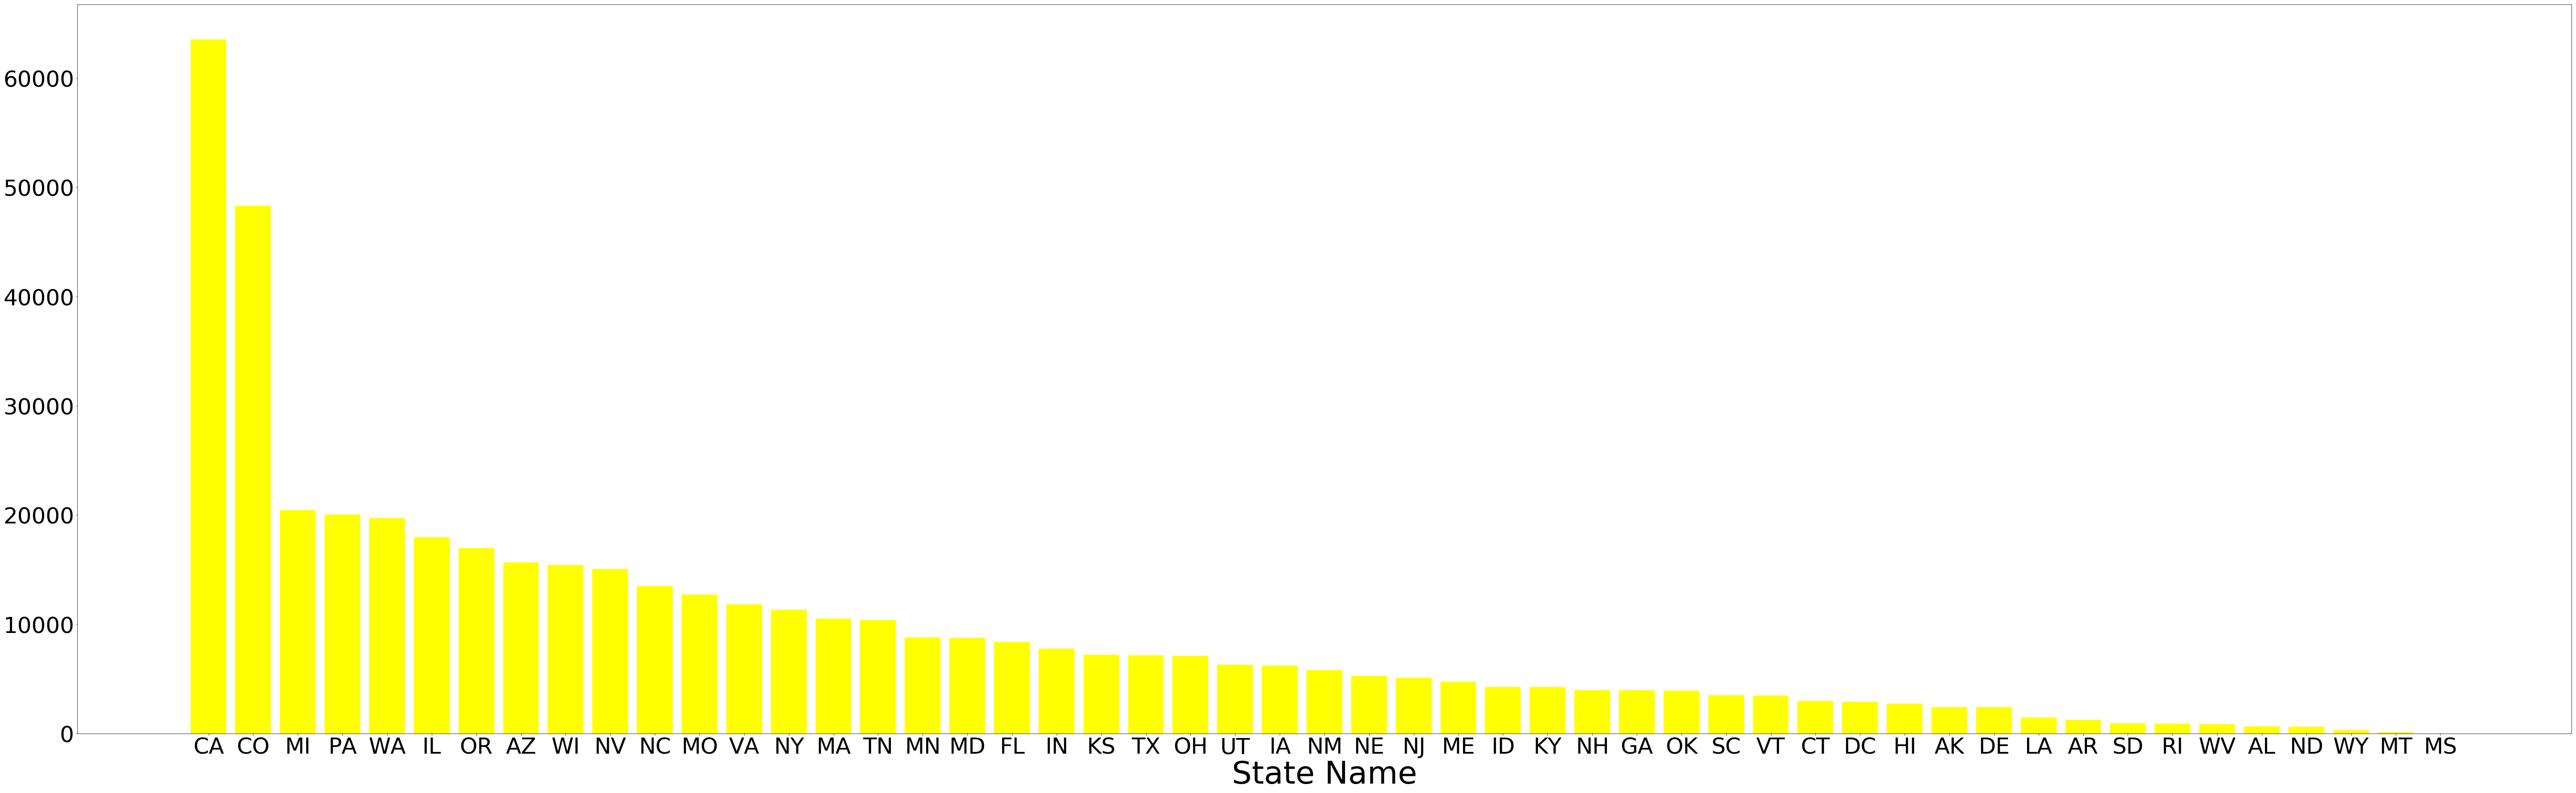

In [11]:
stores_sort = stores.sort_values("2007_stores", ascending=False)
stores_sort_2007 = stores_sort[['State', '2007_stores']]

x_axis2 = np.arange(len(stores_sort_2007))
tick_loc2 = [value for value in x_axis2]
plt.figure(figsize = (100, 30))

plt.bar(x_axis2, stores_sort_2007.iloc[:, 1], color='yellow')
plt.xlabel("State Name", fontsize=70)
plt.xticks(tick_loc2, stores_sort_2007["State"], fontsize=50)
plt.yticks(fontsize=50)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

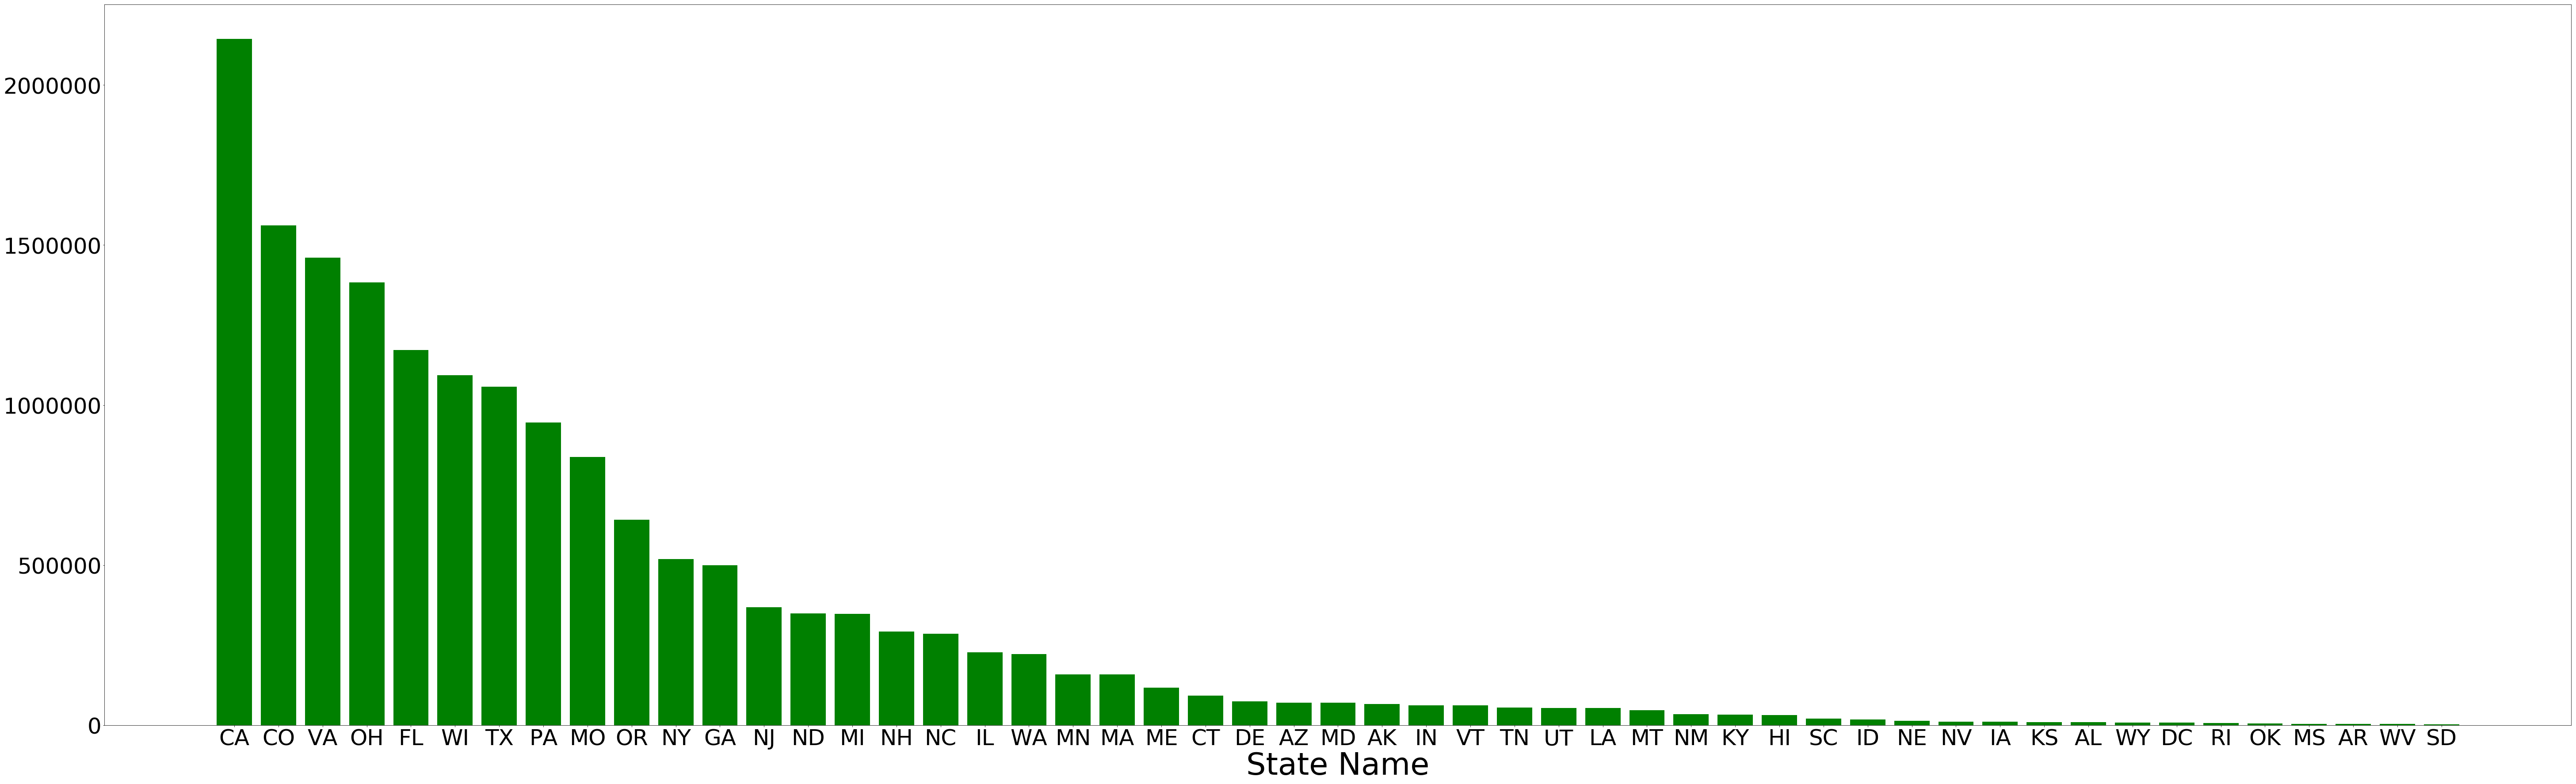

In [12]:
barrels1 = pd.read_csv("revised-aggr-data-beer-2007-2017_barrels.csv", thousands=',').fillna(0)
barrels = barrels1.loc[barrels1['State']!='total']

barrels["2007_barrels"] = pd.to_numeric(barrels["2007_barrels"])
barrels["2008_barrels"] = pd.to_numeric(barrels["2008_barrels"])
barrels["2009_barrels"] = pd.to_numeric(barrels["2009_barrels"])
barrels["2010_barrels"] = pd.to_numeric(barrels["2010_barrels"])
barrels["2011_barrels"] = pd.to_numeric(barrels["2011_barrels"])
barrels["2012_barrels"] = pd.to_numeric(barrels["2012_barrels"])
barrels["2013_barrels"] = pd.to_numeric(barrels["2013_barrels"])
barrels["2014_barrels"] = pd.to_numeric(barrels["2014_barrels"])
barrels["2015_barrels"] = pd.to_numeric(barrels["2015_barrels"])
barrels["2016_barrels"] = pd.to_numeric(barrels["2016_barrels"])
barrels["2017_barrels"] = pd.to_numeric(barrels["2017_barrels"])

barrels.head()

barrels_sort = barrels.sort_values("2017_barrels", ascending=False)
barrels_sort_2017 = barrels_sort[['State', '2017_barrels']]

x_axis = np.arange(len(barrels_sort_2017))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (100, 30))

plt.bar(x_axis, barrels_sort_2017.iloc[:, 1], color='green')
plt.xlabel("State Name", fontsize=70)
plt.xticks(tick_loc, barrels_sort_2017["State"], fontsize=50)
plt.yticks(fontsize=50)
plt.show()

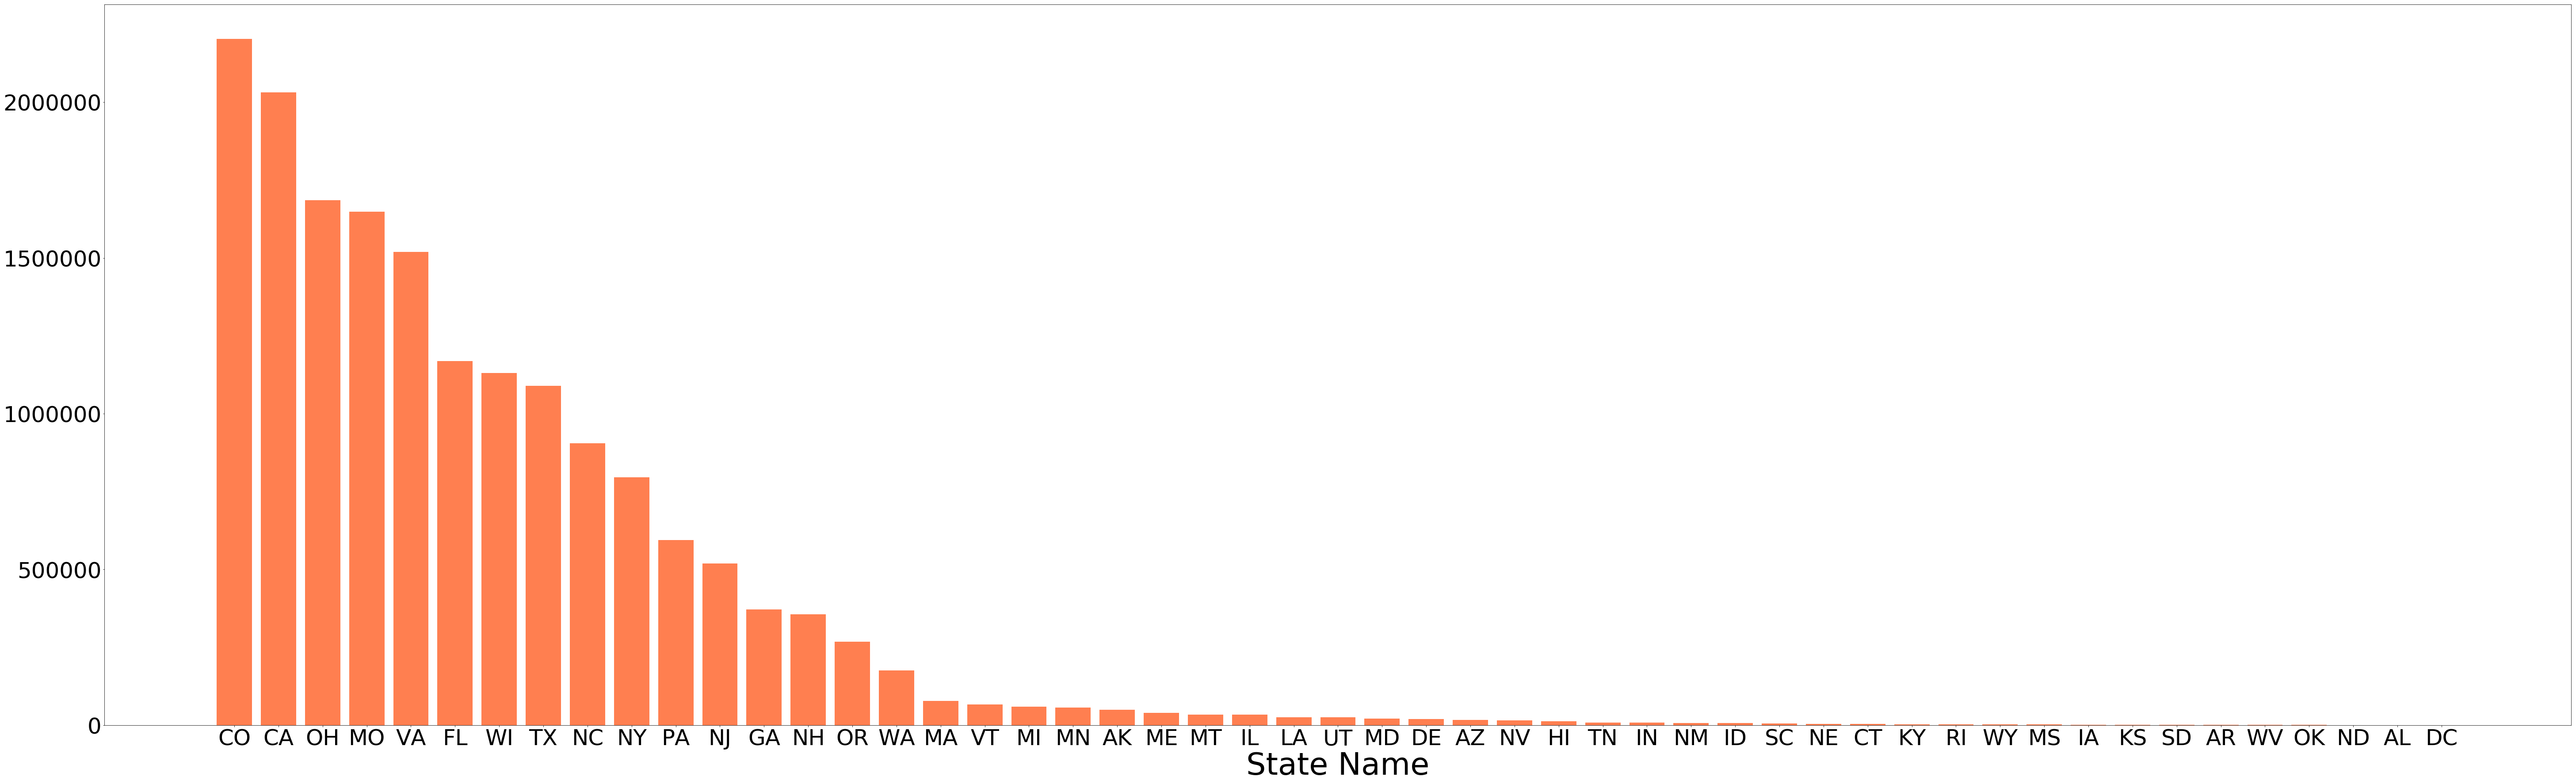

In [13]:
barrels_sort = barrels.sort_values("2007_barrels", ascending=False)
barrels_sort_2007 = barrels_sort[['State', '2007_barrels']]

x_axis = np.arange(len(barrels_sort_2007))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (100, 30))

plt.bar(x_axis, barrels_sort_2007.iloc[:, 1], color='coral')
plt.xlabel("State Name", fontsize=70)
plt.xticks(tick_loc, barrels_sort_2007["State"], fontsize=50)
plt.yticks(fontsize=50)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

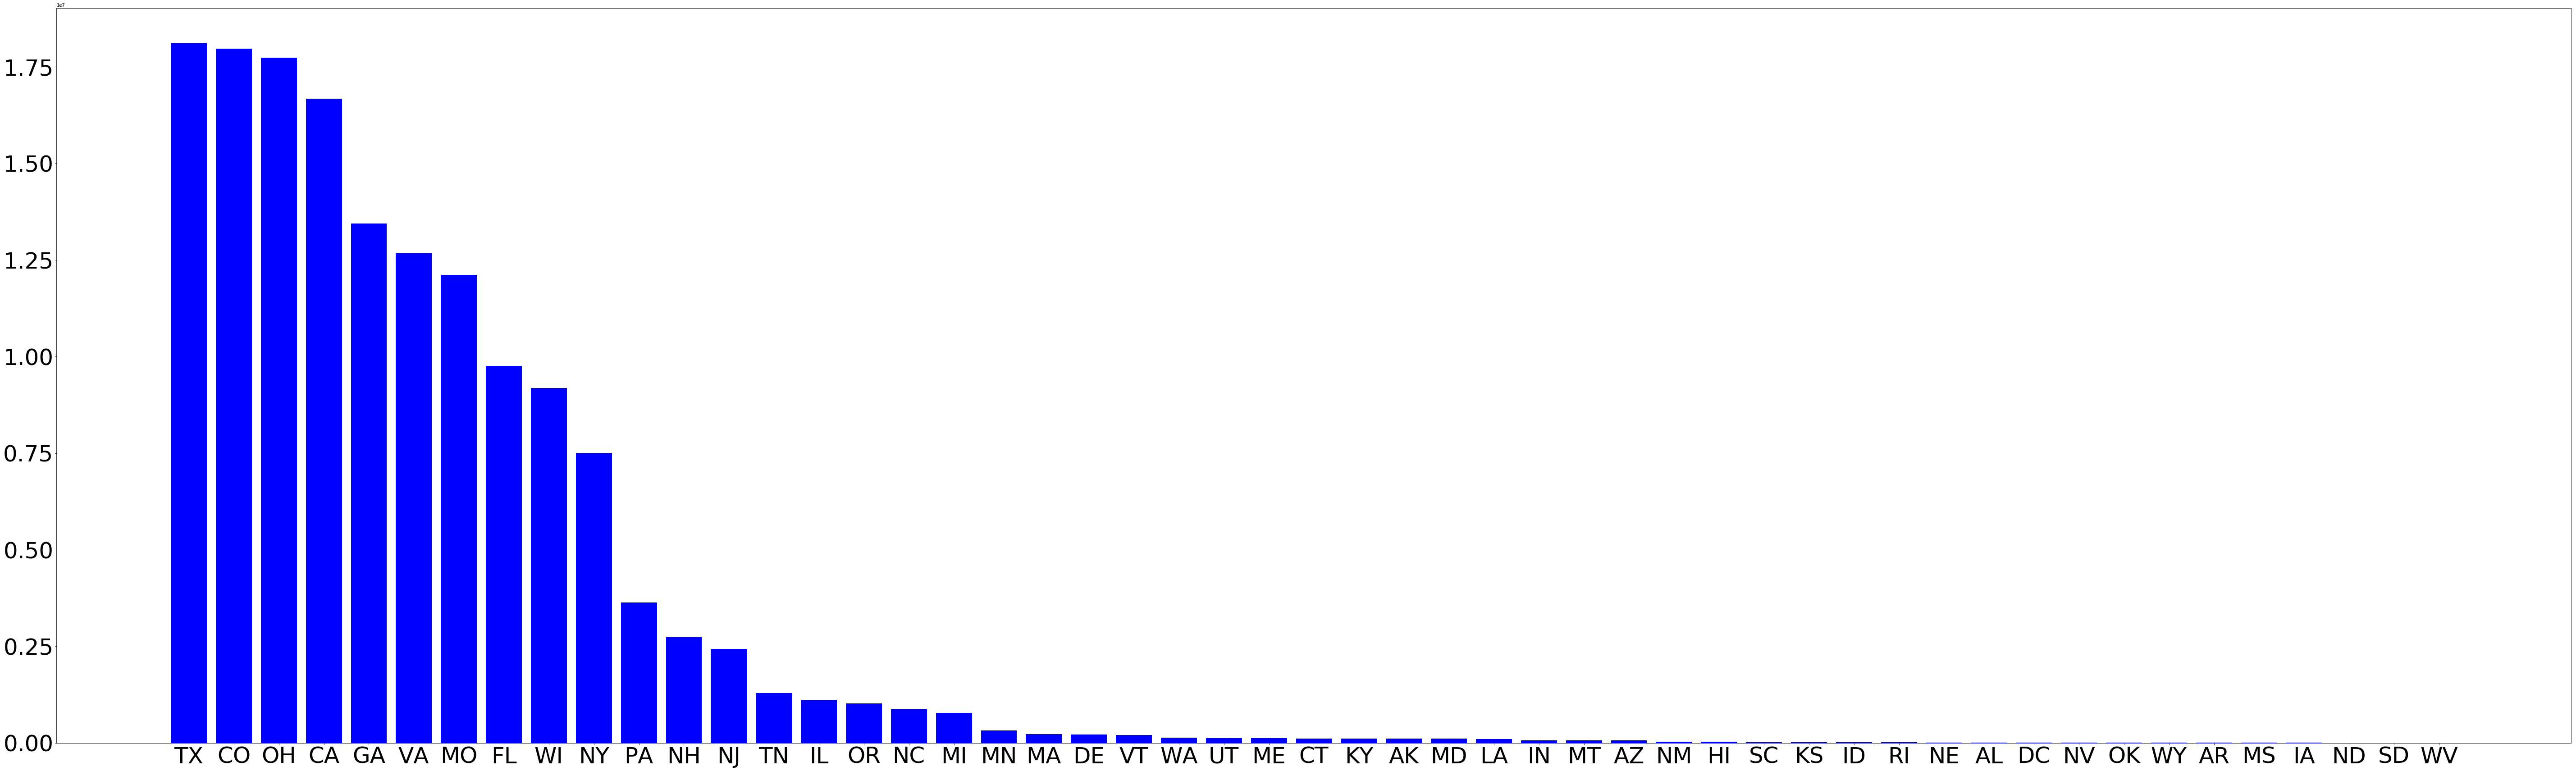

In [14]:
bottles1 = pd.read_csv("revised-aggr-data-beer-2007-2017_bottles.csv").fillna(0)
bottles = bottles1.loc[bottles1['State']!='total']

bottles["2007_bottles"] = pd.to_numeric(bottles["2007_bottles"])
bottles["2008_bottles"] = pd.to_numeric(bottles["2008_bottles"])
bottles["2009_bottles"] = pd.to_numeric(bottles["2009_bottles"])
bottles["2010_bottles"] = pd.to_numeric(bottles["2010_bottles"])
bottles["2011_bottles"] = pd.to_numeric(bottles["2011_bottles"])
bottles["2012_bottles"] = pd.to_numeric(bottles["2012_bottles"])
bottles["2013_bottles"] = pd.to_numeric(bottles["2013_bottles"])
bottles["2014_bottles"] = pd.to_numeric(bottles["2014_bottles"])
bottles["2015_bottles"] = pd.to_numeric(bottles["2015_bottles"])
bottles["2016_bottles"] = pd.to_numeric(bottles["2016_bottles"])
bottles["2017_bottles"] = pd.to_numeric(bottles["2017_bottles"])

bottles.head()

bottles_sort = bottles.sort_values("2017_bottles", ascending=False)
bottles_sort_2017 = bottles_sort[['State', '2017_bottles']]

x_axis = np.arange(len(bottles_sort_2017))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (100, 30))

plt.bar(x_axis, bottles_sort_2017.iloc[:, 1], color='blue')
plt.xticks(tick_loc, bottles_sort_2017["State"], fontsize=50)
plt.yticks(fontsize=50)
plt.show()

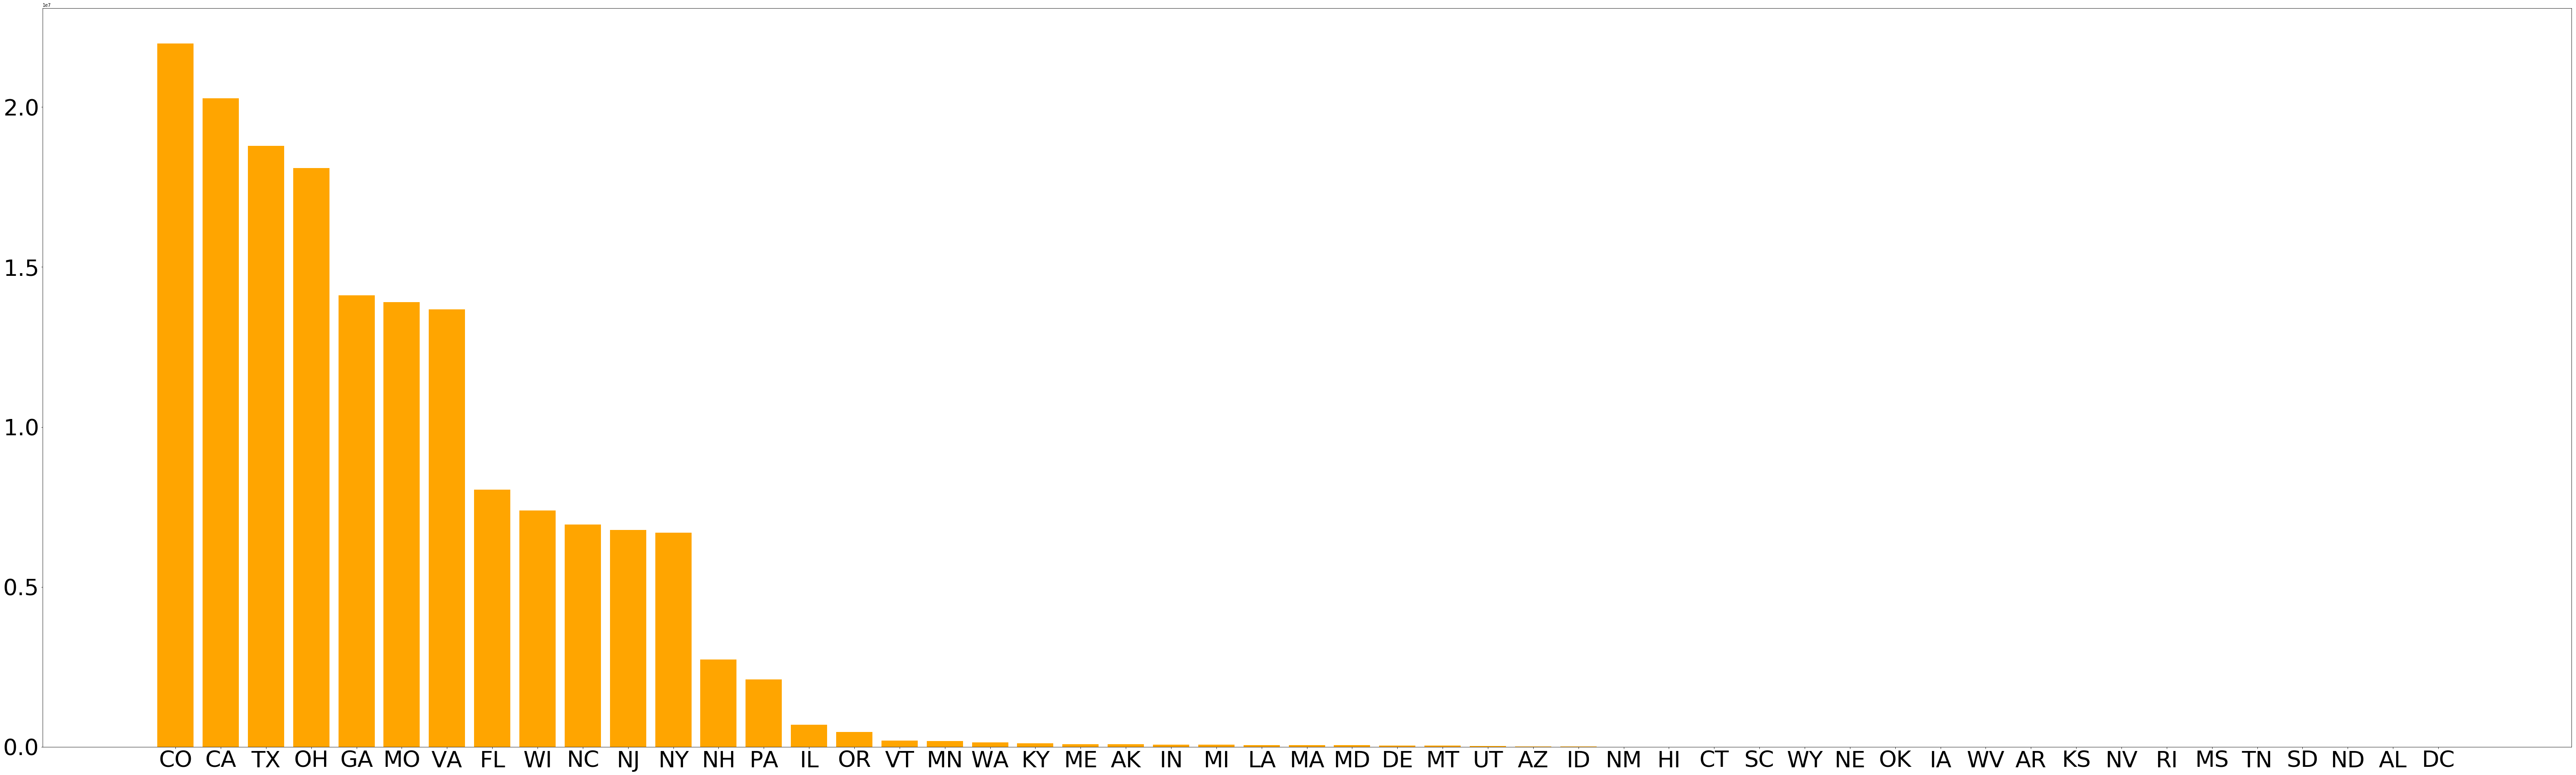

In [15]:
bottles_sort = bottles.sort_values("2007_bottles", ascending=False)
bottles_sort_2007 = bottles_sort[['State', '2007_bottles']]

x_axis = np.arange(len(bottles_sort_2007))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (100, 30))

plt.bar(x_axis, bottles_sort_2007.iloc[:, 1], color='orange')
plt.xticks(tick_loc, bottles_sort_2007["State"], fontsize=50)
plt.yticks(fontsize=50)
plt.show()

In [16]:
# First merge
merge1 = pd.merge(stores, barrels, on='State')
merge1

,State,2007_stores,2008_stores,2009_stores,2010_stores,2011_stores,2012_stores,2013_stores,2014_stores,2015_stores,...,2008_barrels,2009_barrels,2010_barrels,2011_barrels,2012_barrels,2013_barrels,2014_barrels,2015_barrels,2016_barrels,2017_barrels
0,AK,2415.76,2067.69,2263.65,1929.15,2251.02,2312.43,2155.60,2114.97,4511.48,...,50920.35,52278.05,54395.32,58519.66,65679.13,68867.58,73823.62,74606.28,69473.78,66217.06
1,AL,658.60,723.53,238.60,161.24,0.00,46.50,130.55,226.25,6109.99,...,157.33,459.88,547.69,1810.06,6453.45,11747.74,13749.96,11465.23,11846.23,8716.57
2,AR,1246.00,1328.35,1279.34,1331.85,1124.98,1265.93,558.14,657.12,1609.38,...,882.83,1081.95,1318.17,1144.17,125.94,1078.21,2787.48,6965.83,9058.30,3754.97
3,AZ,15668.09,14857.81,15640.69,16800.24,19897.83,19165.96,18763.52,17173.00,29869.10,...,18635.98,18303.18,24410.52,32848.92,44792.72,59074.04,80214.06,74997.94,71863.70,70369.43
4,CA,63557.26,61172.74,54504.99,58276.38,65069.70,64239.95,60559.56,65035.40,124974.70,...,2005517.01,2070667.22,2198550.10,2166028.35,2272768.96,2388676.84,2330092.84,2220498.84,2165833.96,2144580.39
5,CO,48316.88,48528.59,49895.79,50584.87,60811.37,57966.73,60133.43,72839.26,121814.79,...,2564428.26,2285814.82,2279812.02,2277201.65,2290799.82,2177094.68,2207491.04,2083226.02,1898362.52,1560985.12
6,CT,2993.33,2205.67,2075.57,1988.38,2530.80,1876.05,1770.05,1447.60,13218.19,...,3851.71,5471.25,6823.23,8033.77,6849.69,20486.04,33903.03,38194.71,47595.20,91759.81
7,DC,2905.21,2957.74,2948.61,3574.26,1676.54,1572.75,2250.90,4504.30,7207.31,...,0.00,0.00,1366.16,4257.53,5934.43,8335.80,0.00,8925.18,9664.33,8165.04
8,DE,2396.49,2005.33,2205.38,2308.99,2541.38,2718.28,2868.28,2771.70,5865.02,...,25709.65,37560.36,48117.54,57886.92,65524.44,75629.27,82037.96,83489.86,78225.11,74403.02
9,FL,8376.90,7078.61,6426.66,7554.46,6761.68,6817.80,6440.29,6585.28,38265.32,...,1188745.72,1297356.04,1247064.73,1287687.46,1289450.36,1260567.42,1242022.65,1245516.38,1186318.43,1172084.57


In [17]:
# Second merge
total_sales = pd.merge(merge1, bottles, on='State')
total_sales.head(10)

,State,2007_stores,2008_stores,2009_stores,2010_stores,2011_stores,2012_stores,2013_stores,2014_stores,2015_stores,...,2008_bottles,2009_bottles,2010_bottles,2011_bottles,2012_bottles,2013_bottles,2014_bottles,2015_bottles,2016_bottles,2017_bottles
0,AK,2415.76,2067.69,2263.65,1929.15,2251.02,2312.43,2155.60,2114.97,4511.48,...,81218.75,89762.16,80889.21,94781.57,105416.32,112008.59,129181.74,126309.22,115823.75,109652.22
1,AL,658.60,723.53,238.60,161.24,0.00,46.50,130.55,226.25,6109.99,...,0.00,0.00,0.00,658.96,2485.79,6634.43,9521.26,10543.00,9977.46,11779.07
2,AR,1246.00,1328.35,1279.34,1331.85,1124.98,1265.93,558.14,657.12,1609.38,...,1206.73,1269.26,1445.82,1382.06,8.00,8.00,800.09,872.11,1737.10,7295.70
3,AZ,15668.09,14857.81,15640.69,16800.24,19897.83,19165.96,18763.52,17173.00,29869.10,...,6980.87,7383.27,10380.26,14057.56,18411.25,22318.65,29645.05,44032.85,59031.78,66483.94
4,CA,63557.26,61172.74,54504.99,58276.38,65069.70,64239.95,60559.56,65035.40,124974.70,...,20082718.48,19452836.45,19095643.27,18204514.85,18940276.02,17838853.36,18052809.23,17701780.59,17569308.63,16669538.06
5,CO,48316.88,48528.59,49895.79,50584.87,60811.37,57966.73,60133.43,72839.26,121814.79,...,24182900.40,21095113.55,18742266.67,18820319.55,19267902.29,18549122.13,18035909.80,17755216.77,18105206.85,17964830.08
6,CT,2993.33,2205.67,2075.57,1988.38,2530.80,1876.05,1770.05,1447.60,13218.19,...,1985.86,3152.59,4822.66,5578.56,6372.31,21549.90,50874.70,80241.60,85586.12,118767.89
7,DC,2905.21,2957.74,2948.61,3574.26,1676.54,1572.75,2250.90,4504.30,7207.31,...,732.36,629.61,184.80,332.23,1727.77,3546.13,4265.73,9222.28,9485.89,8679.10
8,DE,2396.49,2005.33,2205.38,2308.99,2541.38,2718.28,2868.28,2771.70,5865.02,...,57376.89,73743.37,89753.27,109745.27,129493.68,148156.85,167806.22,176483.90,174130.96,214555.74
9,FL,8376.90,7078.61,6426.66,7554.46,6761.68,6817.80,6440.29,6585.28,38265.32,...,8301524.51,9028726.18,9232548.52,9380672.31,9738023.02,9521482.11,9439058.04,9842764.82,10028963.53,9755187.06


In [ ]:
# Get total sales for each year
total_sales["2007_total"] = total_sales["2007_stores"] + total_sales["2007_bottles"] + total_sales["2007_barrels"]
total_sales["2008_total"] = total_sales["2008_stores"] + total_sales["2008_bottles"] + total_sales["2008_barrels"]
total_sales['2009_total'] = total_sales['2009_stores']+total_sales['2009_bottles']+total_sales['2009_barrels']
total_sales['2010_total'] = total_sales['2010_stores']+total_sales['2010_bottles']+total_sales['2010_barrels']
total_sales['2011_total'] = total_sales['2011_stores']+total_sales['2011_bottles']+total_sales['2011_barrels']
total_sales['2012_total'] = total_sales['2012_stores']+total_sales['2012_bottles']+total_sales['2012_barrels']
total_sales['2013_total'] = total_sales['2013_stores']+total_sales['2013_bottles']+total_sales['2013_barrels']
total_sales['2014_total'] = total_sales['2014_stores']+total_sales['2014_bottles']+total_sales['2014_barrels']
total_sales['2015_total'] = total_sales['2015_stores']+total_sales['2015_bottles']+total_sales['2015_barrels']
total_sales['2016_total'] = total_sales['2016_stores']+total_sales['2016_bottles']+total_sales['2016_barrels']
total_sales['2017_total'] = total_sales['2017_stores']+total_sales['2017_bottles']+total_sales['2017_barrels']

state_totals = total_sales[['State', "2007_total", "2008_total", "2009_total", "2010_total", "2011_total",
                "2012_total", "2013_total", "2014_total", "2015_total", "2016_total", "2017_total"]]
state_totals

In [ ]:
state_totals.dtypes

In [ ]:
iyear = 2007
years = []
for i in range(11):
    iyear = 2007 + i
    years.append(iyear)

# Plot for lowest producing states
plt.plot(years, state_totals.iloc[1, 1:], 'k-',  color = "red", label = 'Alabama')
plt.plot(years, state_totals.iloc[2, 1:], 'k-',  color = "rosybrown", label = 'Arkansas')
plt.plot(years, state_totals.iloc[7, 1:], 'k-',  color = "lightcoral", label = 'DC')
plt.plot(years, state_totals.iloc[25, 1:], 'k-',  color = "indianred", label = 'Mississippi')
plt.plot(years, state_totals.iloc[36, 1:], 'k-',  color = "firebrick", label = 'Oklahoma')
plt.plot(years, state_totals.iloc[39, 1:], 'k-',  color = "maroon", label = 'Rhode Island')
plt.plot(years, state_totals.iloc[41, 1:], 'k-',  color = "darkred", label = 'South Dakota')
plt.plot(years, state_totals.iloc[49, 1:], 'k-',  color = "brown", label = 'West Virginia')
plt.plot(years, state_totals.iloc[50, 1:], 'k-',  color = "hotpink", label = 'Wyoming')

plt.xlabel('Year')
plt.ylabel('Production Total in barrels')
plt.legend(loc='best')

plt.show()

In [ ]:
# Plot second group of states
plt.plot(years, state_totals.iloc[11, 1:], 'k-',  color = "tomato", label = 'Hawaii')
plt.plot(years, state_totals.iloc[12, 1:], 'k-',  color = "coral", label = 'Iowa')
plt.plot(years, state_totals.iloc[13, 1:], 'k-',  color = "sienna", label = 'Idaho')
plt.plot(years, state_totals.iloc[16, 1:], 'k-',  color = "chocolate", label = 'Kansas')
plt.plot(years, state_totals.iloc[29, 1:], 'k-',  color = "saddlebrown", label = 'Nebraska')
plt.plot(years, state_totals.iloc[32, 1:], 'k-',  color = "sandybrown", label = 'New Mexico')
plt.plot(years, state_totals.iloc[33, 1:], 'k-',  color = "salmon", label = 'Nevada')
plt.plot(years, state_totals.iloc[40, 1:], 'k-',  color = "peru", label = 'South Carolina')

plt.xlabel('Year')
plt.ylabel('Production Total in barrels')
plt.legend(loc='best')

plt.show()

In [ ]:
#Plot third group of states
plt.plot(years, state_totals.iloc[0, 1:], 'k-',  color = "darkorange", label = 'Alaska')
plt.plot(years, state_totals.iloc[3, 1:], 'k-',  color = "darkgoldenrod", label = 'Arizona')
plt.plot(years, state_totals.iloc[8, 1:], 'k-',  color = "orange", label = 'Delaware')
plt.plot(years, state_totals.iloc[15, 1:], 'k-',  color = "goldenrod", label = 'Indiana')
plt.plot(years, state_totals.iloc[17, 1:], 'k-',  color = "gold", label = 'Kentucky')
plt.plot(years, state_totals.iloc[18, 1:], 'k-',  color = "darkkhaki", label = 'Lousiana')
plt.plot(years, state_totals.iloc[20, 1:], 'k-',  color = "olive", label = 'Maryland')
plt.plot(years, state_totals.iloc[21, 1:], 'k-',  color = "y", label = 'Maine')
plt.plot(years, state_totals.iloc[26, 1:], 'k-',  color = "olivedrab", label = 'Montana')
plt.plot(years, state_totals.iloc[44, 1:], 'k-',  color = "darkseagreen", label = 'Utah')

plt.xlabel('Year')
plt.ylabel('Production Total in barrels')
plt.legend(loc='best', ncol=2, bbox_to_anchor=(0.75, -0.15))

plt.show()

In [ ]:
# Plot highest producing states
plt.plot(years, state_totals.iloc[9, 1:], 'k-',  color = "steelblue", label = 'Florida')
plt.plot(years, state_totals.iloc[10, 1:], 'k-',  color = "blue", label = 'Georgia')
plt.plot(years, state_totals.iloc[45, 1:], 'k-',  color = "indigo", label = 'Virginia')
plt.plot(years, state_totals.iloc[5, 1:], 'k-',  color = "purple", label = 'Colorado')
plt.plot(years, state_totals.iloc[4, 1:], 'k-',  color = "violet", label = 'California')
plt.plot(years, state_totals.iloc[24, 1:], 'k-',  color = "m", label = 'Missouri')

plt.xlabel('Year')
plt.ylabel('Production Total in barrels (x10^7)')
plt.legend(loc='best', ncol=2, bbox_to_anchor=(0.75, -0.15))

plt.show()